In [1]:
from konlpy.tag import Kkma
kkma = Kkma()

In [2]:
kkma.sentences('한국어 분석을 시작합니다 재미있어요~')
#마침표가 없어도 2개의 문장으로 구분

['한국어 분석을 시작합니다', '재미있어요~']

In [3]:
kkma.nouns('한국어 분석을 시작합니다 재미있어요~')
# 명사 분석도 가능

['한국어', '분석']

In [4]:
kkma.pos('한국어 분석을 시작합니다 재미있어요~')
# pos(형태소분석)도 가능
# 형태소: 최소한의 의미 단위

[('한국어', 'NNG'),
 ('분석', 'NNG'),
 ('을', 'JKO'),
 ('시작하', 'VV'),
 ('ㅂ니다', 'EFN'),
 ('재미있', 'VA'),
 ('어요', 'EFN'),
 ('~', 'SO')]

In [7]:
from konlpy.tag import Hannanum
hannanum = Hannanum()

In [8]:
hannanum.nouns('한국어 분석을 시작합니다 재미있어요~')

['한국어', '분석', '시작']

In [9]:
hannanum.morphs('한국어 분석을 시작합니다 재미있어요~')

['한국어', '분석', '을', '시작', '하', 'ㅂ니다', '재미있', '어요', '~']

In [11]:
hannanum.pos('한국어 분석을 시작합니다 재미있어요~')

[('한국어', 'N'),
 ('분석', 'N'),
 ('을', 'J'),
 ('시작', 'N'),
 ('하', 'X'),
 ('ㅂ니다', 'E'),
 ('재미있', 'P'),
 ('어요', 'E'),
 ('~', 'S')]

In [12]:
from konlpy.tag import Twitter
t = Twitter()

In [14]:
t.nouns('한국어 분석을 시작합니다 재미있어요~')

['한국어', '분석']

In [15]:
t.morphs('한국어 분석을 시작합니다 재미있어요~')

['한국어', '분석', '을', '시작합', '니다', '재미있어', '요', '~']

In [16]:
t.pos('한국어 분석을 시작합니다 재미있어요~')

[('한국어', 'Noun'),
 ('분석', 'Noun'),
 ('을', 'Josa'),
 ('시작합', 'Verb'),
 ('니다', 'Eomi'),
 ('재미있어', 'Adjective'),
 ('요', 'Eomi'),
 ('~', 'Punctuation')]

In [19]:
#워드 클라우드: 자주 나타나는 단어를 크게 보여줌으로서 시각적으로 텍스트를 알려줌
from wordcloud import WordCloud, STOPWORDS

import numpy as np
from PIL import Image

In [20]:
text = open('../data/09. alice.txt').read()
alice_mask = np.array(Image.open('../data/09. alice_mask.png'))

stopwords = set(STOPWORDS)
stopwords.add("said")

In [21]:
import matplotlib.pyplot as plt
import platform

path = "c:/Windows/Fonts/malgun.ttf"
from matplotlib import font_manager, rc
if platform.system() == 'Darwin':
    rc('font', family='AppleGothic')
elif platform.system() == 'Windows':
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc('font', family=font_name)
else:
    print('Unknown system... sorry~~~~') 
    
%matplotlib inline

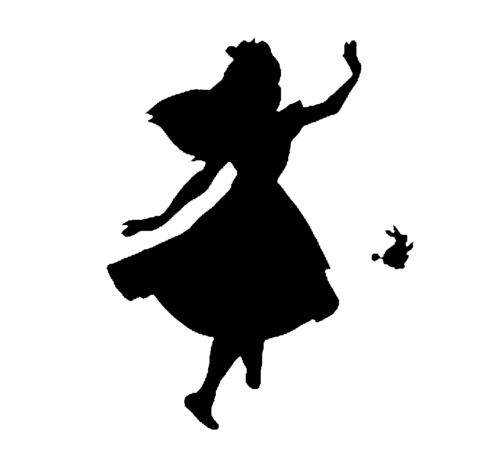

In [22]:
plt.figure(figsize=(8,8))
plt.imshow(alice_mask, cmap=plt.cm.gray, interpolation='bilinear')
plt.axis('off')
plt.show()

In [23]:
wc = WordCloud(background_color='white', max_words=2000, mask=alice_mask, stopwords= stopwords)
wc = wc.generate(text)
wc.words_

{'Alice': 1.0,
 'little': 0.2958904109589041,
 'one': 0.2602739726027397,
 'know': 0.2465753424657534,
 'went': 0.2273972602739726,
 'thing': 0.2191780821917808,
 'time': 0.21095890410958903,
 'Queen': 0.20821917808219179,
 'see': 0.18356164383561643,
 'King': 0.17534246575342466,
 'now': 0.1643835616438356,
 'began': 0.1589041095890411,
 'way': 0.15616438356164383,
 'Hatter': 0.15616438356164383,
 'head': 0.15342465753424658,
 'Mock Turtle': 0.15342465753424658,
 'say': 0.1506849315068493,
 'Gryphon': 0.1506849315068493,
 'well': 0.14794520547945206,
 'think': 0.14520547945205478,
 'quite': 0.14246575342465753,
 'much': 0.13972602739726028,
 'first': 0.13972602739726028,
 'go': 0.136986301369863,
 'thought': 0.13424657534246576,
 'come': 0.13150684931506848,
 'never': 0.12876712328767123,
 'voice': 0.12602739726027398,
 'looked': 0.1232876712328767,
 'got': 0.1232876712328767,
 'must': 0.12054794520547946,
 'Cat': 0.12054794520547946,
 'Mouse': 0.12054794520547946,
 'Duchess': 0.11506

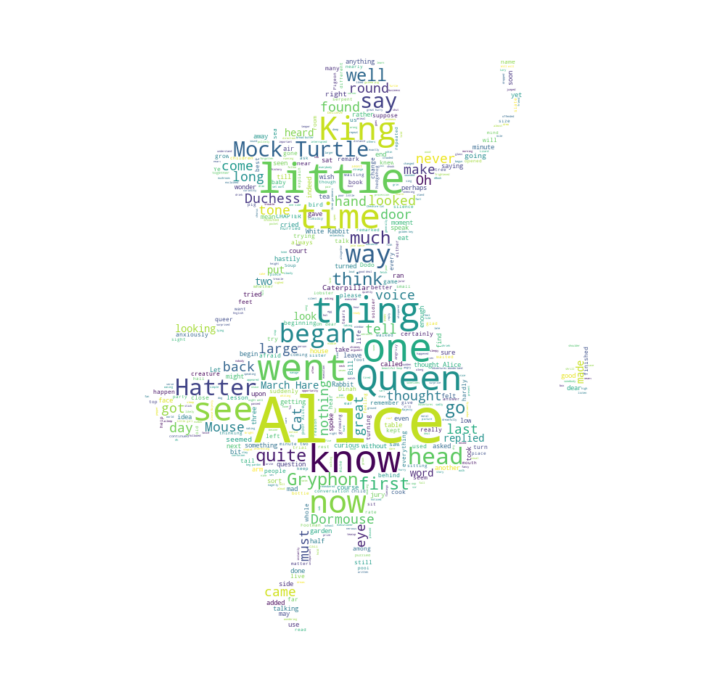

In [24]:
plt.figure(figsize=(12,12))
plt.imshow(wc, interpolation='bilinear')
plt.axis('off')
plt.show()

In [25]:
# 육아휴직 관련 법안에 대한 분석
import nltk

In [26]:
from konlpy.corpus import kobill
files_ko = kobill.fileids()
doc_ko = kobill.open('1809890.txt').read() # konlpy내부문서중 육아휴직 관련 법안 제 1809890호

In [27]:
doc_ko

'지방공무원법 일부개정법률안\n\n(정의화의원 대표발의 )\n\n 의 안\n 번 호\n\n9890\n\n발의연월일 : 2010.  11.  12.  \n\n발  의  자 : 정의화․이명수․김을동 \n\n이사철․여상규․안규백\n\n황영철․박영아․김정훈\n\n김학송 의원(10인)\n\n제안이유 및 주요내용\n\n  초등학교 저학년의 경우에도 부모의 따뜻한 사랑과 보살핌이 필요\n\n한 나이이나, 현재 공무원이 자녀를 양육하기 위하여 육아휴직을 할 \n\n수 있는 자녀의 나이는 만 6세 이하로 되어 있어 초등학교 저학년인 \n\n자녀를 돌보기 위해서는 해당 부모님은 일자리를 그만 두어야 하고 \n\n이는 곧 출산의욕을 저하시키는 문제로 이어질 수 있을 것임.\n\n  따라서 육아휴직이 가능한 자녀의 연령을 만 8세 이하로 개정하려\n\n는 것임(안 제63조제2항제4호).\n\n- 1 -\n\n\x0c법률  제        호\n\n지방공무원법 일부개정법률안\n\n지방공무원법 일부를 다음과 같이 개정한다.\n\n제63조제2항제4호 중 “만 6세 이하의 초등학교 취학 전 자녀를”을 “만 \n\n8세 이하(취학 중인 경우에는 초등학교 2학년 이하를 말한다)의 자녀를”\n\n로 한다.\n\n부      칙\n\n이 법은 공포한 날부터 시행한다.\n\n- 3 -\n\n\x0c신 ·구조문대비표\n\n현      행\n\n개   정   안\n\n제63조(휴직) ① (생  략)\n\n제63조(휴직) ① (현행과 같음)\n\n  ② 공무원이 다음 각 호의 어\n\n  ② -------------------------\n\n느 하나에 해당하는 사유로 휴\n\n----------------------------\n\n직을 원하면 임용권자는 휴직\n\n----------------------------\n\n을 명할 수 있다. 다만, 제4호\n\n-------------.---------------\n\n의 경우에는 대통령령으로 정\n\n---------------------------

In [28]:
tokens_ko = t.nouns(doc_ko)
tokens_ko

['지방공무원법',
 '일부',
 '개정',
 '법률',
 '안',
 '정의화',
 '의원',
 '대표',
 '발의',
 '의',
 '안',
 '번',
 '호',
 '발의',
 '연월일',
 '발',
 '의',
 '자',
 '정의화',
 '이명수',
 '김을동',
 '이사철',
 '여상규',
 '안규백',
 '황영철',
 '박영아',
 '김정훈',
 '김학송',
 '의원',
 '인',
 '제안',
 '이유',
 '및',
 '주요',
 '내용',
 '초등학교',
 '저학년',
 '경우',
 '부모',
 '사랑',
 '필요',
 '나이',
 '현재',
 '공무원',
 '자녀',
 '양육',
 '육아휴직',
 '수',
 '자녀',
 '나이',
 '만',
 '세',
 '이하',
 '초등학교',
 '저학년',
 '자녀',
 '해당',
 '부모님',
 '일자리',
 '곧',
 '출산',
 '의욕',
 '저하',
 '문제',
 '수',
 '것임',
 '따라서',
 '육아휴직',
 '자녀',
 '연령',
 '만',
 '세',
 '이하',
 '개정',
 '것임',
 '안',
 '제',
 '조제',
 '항제',
 '호',
 '법률',
 '제',
 '호',
 '지방공무원법',
 '일부',
 '개정',
 '법률',
 '안',
 '지방공무원법',
 '일부',
 '다음',
 '개정',
 '제',
 '조제',
 '항제',
 '호',
 '중',
 '만',
 '세',
 '이하',
 '초등학교',
 '취학',
 '전',
 '자녀',
 '만',
 '세',
 '이하',
 '취학',
 '중인',
 '경우',
 '초등학교',
 '학년',
 '이하',
 '의',
 '자녀',
 '로',
 '부',
 '칙',
 '이',
 '법',
 '공포',
 '날',
 '시행',
 '신',
 '구조',
 '문대비',
 '표',
 '현',
 '행',
 '개',
 '정',
 '안',
 '제',
 '조',
 '휴직',
 '생',
 '략',
 '제',
 '조',
 '휴직',
 '현행',
 '공무원',
 '다음',
 '각',


In [29]:
ko = nltk.Text(tokens_ko, name='대한민국 국회 의안 제 1809890호')
print(len(ko.tokens)) # 토큰 갯수
print(len(set(ko.tokens))) # 유니크한 토큰 갯수
ko.vocab() #

735
258


FreqDist({'가능': 4,
          '가정': 7,
          '각': 1,
          '값': 2,
          '개': 1,
          '개정': 8,
          '개정안': 3,
          '거나': 1,
          '것': 6,
          '것임': 2,
          '경비': 1,
          '경우': 16,
          '고': 1,
          '고용': 14,
          '고용노동부': 3,
          '곧': 1,
          '공': 1,
          '공무원': 10,
          '공포': 1,
          '관련': 2,
          '교육': 4,
          '구조': 1,
          '국가': 2,
          '국가공무원': 2,
          '국회예산정책처': 2,
          '규정': 1,
          '규칙': 1,
          '근거': 1,
          '근로자': 3,
          '급여': 8,
          '기': 1,
          '기간': 1,
          '기업체': 1,
          '기자': 1,
          '김': 1,
          '김을동': 1,
          '김정훈': 1,
          '김학송': 1,
          '까지': 1,
          '나이': 2,
          '날': 1,
          '남녀': 1,
          '내용': 1,
          '년': 7,
          '논의': 1,
          '느': 1,
          '다만': 1,
          '다시': 1,
          '다음': 5,
          '단서': 1,
          '단위': 1,
          '대상': 2,
   

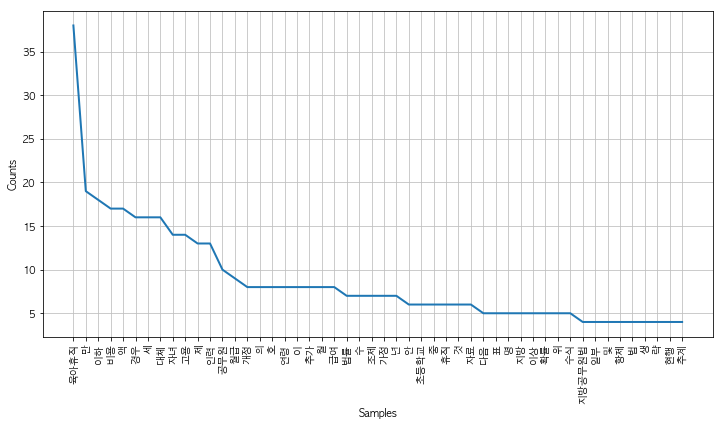

In [30]:
plt.figure(figsize=(12,6))
ko.plot(50)
plt.show()
#많이 등장한 순으로 plot

In [31]:
stop_words = ['.', '(', ')', ',', "'", '%', '-', 'X', ').', '×','의','자','에','안','번',
                      '호','을','이','다','만','로','가','를']

# 의미없는 불용어는 제외
ko = [each_word for each_word in ko if each_word not in stop_words]
ko

['지방공무원법',
 '일부',
 '개정',
 '법률',
 '정의화',
 '의원',
 '대표',
 '발의',
 '발의',
 '연월일',
 '발',
 '정의화',
 '이명수',
 '김을동',
 '이사철',
 '여상규',
 '안규백',
 '황영철',
 '박영아',
 '김정훈',
 '김학송',
 '의원',
 '인',
 '제안',
 '이유',
 '및',
 '주요',
 '내용',
 '초등학교',
 '저학년',
 '경우',
 '부모',
 '사랑',
 '필요',
 '나이',
 '현재',
 '공무원',
 '자녀',
 '양육',
 '육아휴직',
 '수',
 '자녀',
 '나이',
 '세',
 '이하',
 '초등학교',
 '저학년',
 '자녀',
 '해당',
 '부모님',
 '일자리',
 '곧',
 '출산',
 '의욕',
 '저하',
 '문제',
 '수',
 '것임',
 '따라서',
 '육아휴직',
 '자녀',
 '연령',
 '세',
 '이하',
 '개정',
 '것임',
 '제',
 '조제',
 '항제',
 '법률',
 '제',
 '지방공무원법',
 '일부',
 '개정',
 '법률',
 '지방공무원법',
 '일부',
 '다음',
 '개정',
 '제',
 '조제',
 '항제',
 '중',
 '세',
 '이하',
 '초등학교',
 '취학',
 '전',
 '자녀',
 '세',
 '이하',
 '취학',
 '중인',
 '경우',
 '초등학교',
 '학년',
 '이하',
 '자녀',
 '부',
 '칙',
 '법',
 '공포',
 '날',
 '시행',
 '신',
 '구조',
 '문대비',
 '표',
 '현',
 '행',
 '개',
 '정',
 '제',
 '조',
 '휴직',
 '생',
 '략',
 '제',
 '조',
 '휴직',
 '현행',
 '공무원',
 '다음',
 '각',
 '호의',
 '어',
 '느',
 '하나',
 '사유',
 '직',
 '임용',
 '휴직',
 '명',
 '수',
 '다만',
 '제',
 '경우',
 '대통령령',
 '정',
 '사정',
 '직',
 '명',
 

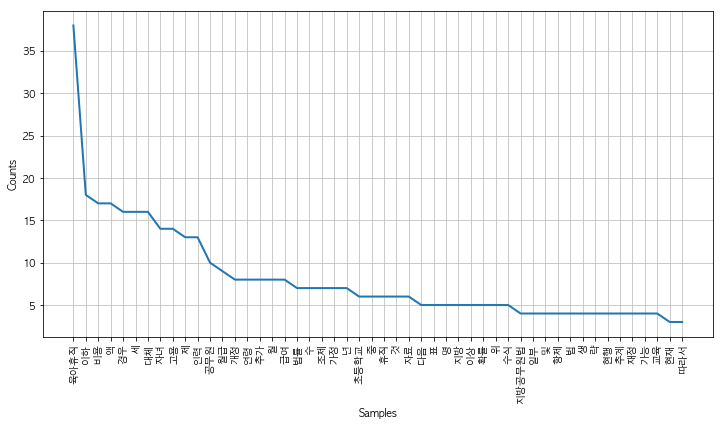

In [32]:
ko = nltk.Text(ko, name='대한민국 국회 의안 제 1809890호')

plt.figure(figsize=(12,6))
ko.plot(50)
plt.show()


In [33]:
ko.count('초등학교')

6

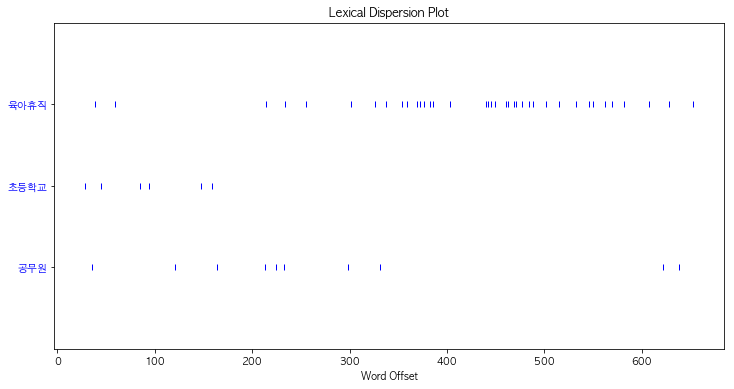

In [34]:
plt.figure(figsize=(12,6))
ko.dispersion_plot(['육아휴직','초등학교','공무원']) #어떤 단어가 문서내 어디서 몇번 언급되었는지 확인 가능

In [35]:
ko.concordance('초등학교') # 원하는 단어 주변부 단어까지 같이 확인

Displaying 6 of 6 matches:
백 황영철 박영아 김정훈 김학송 의원 인 제안 이유 및 주요 내용 초등학교 저학년 경우 부모 사랑 필요 나이 현재 공무원 자녀 양육 육아휴직
필요 나이 현재 공무원 자녀 양육 육아휴직 수 자녀 나이 세 이하 초등학교 저학년 자녀 해당 부모님 일자리 곧 출산 의욕 저하 문제 수 것임
개정 법률 지방공무원법 일부 다음 개정 제 조제 항제 중 세 이하 초등학교 취학 전 자녀 세 이하 취학 중인 경우 초등학교 학년 이하 자녀 
항제 중 세 이하 초등학교 취학 전 자녀 세 이하 취학 중인 경우 초등학교 학년 이하 자녀 부 칙 법 공포 날 시행 신 구조 문대비 표 현 
 수 다만 제 경우 대통령령 정 사정 직 명 생 략 현행 세 이하 초등학교 취 세 이하 취학 중인 경우 학 전 자녀 양육 위하 초등학교 학년
이하 초등학교 취 세 이하 취학 중인 경우 학 전 자녀 양육 위하 초등학교 학년 이하 여 여자 공무원 자녀 임신 출산 때 생 략 생 략 현행


In [36]:
ko.collocations() # 문서내 어떤 단어들이 연어(collocation)로 사용되었는지 확인 가능

초등학교 저학년; 근로자 육아휴직; 육아휴직 대상자; 공무원 육아휴직


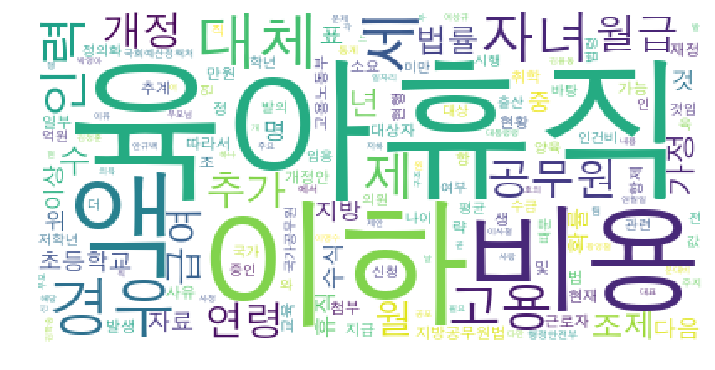

In [38]:
data = ko.vocab().most_common(150)

# for win : font_path='c:/Windows/Fonts/malgun.ttf'
wordcloud = WordCloud(font_path='/Library/Fonts/AppleGothic.ttf',
                      relative_scaling = 0.2,
                      background_color='white',
                      ).generate_from_frequencies(dict(data))
plt.figure(figsize=(12,8))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

In [37]:
# Naive Bayes Classifier의 이해 - 영문
from nltk.tokenize import word_tokenize
import nltk

In [39]:
train = [('i like you', 'pos'), 
         ('i hate you', 'neg'), 
         ('you like me', 'neg'),
         ('i like her', 'pos')]

In [41]:
all_words = set(word.lower() for sentence in train 
                               for word in word_tokenize(sentence[0]))

all_words #말뭉치

{'hate', 'her', 'i', 'like', 'me', 'you'}

In [42]:
t = [({word: (word in word_tokenize(x[0])) for word in all_words}, x[1])
                                                        for x in train]

t # 첫번째 문장 기준으로 말중치 단어가 문장에 있는지 없는지를 표시, True면 해당 말뭉치 단어가 문장에 있음

[({'hate': False,
   'her': False,
   'i': True,
   'like': True,
   'me': False,
   'you': True},
  'pos'),
 ({'hate': True,
   'her': False,
   'i': True,
   'like': False,
   'me': False,
   'you': True},
  'neg'),
 ({'hate': False,
   'her': False,
   'i': False,
   'like': True,
   'me': True,
   'you': True},
  'neg'),
 ({'hate': False,
   'her': True,
   'i': True,
   'like': True,
   'me': False,
   'you': False},
  'pos')]

In [43]:
classifier = nltk.NaiveBayesClassifier.train(t)
classifier.show_most_informative_features()

# 결과를 해석하면
# like라는 단어가 있을 때 positive, negative 비율이 1.7:1.0 이라는 의미

Most Informative Features
                    like = True              pos : neg    =      1.7 : 1.0
                    hate = False             pos : neg    =      1.7 : 1.0
                     you = True              neg : pos    =      1.7 : 1.0
                       i = True              pos : neg    =      1.7 : 1.0
                     her = False             neg : pos    =      1.7 : 1.0
                      me = False             pos : neg    =      1.7 : 1.0


In [44]:
test_sentence = 'i like MeRui'
test_sent_features = {word.lower():
                                (word in word_tokenize(test_sentence.lower())) for word in all_words}

In [45]:
test_sent_features

{'hate': False,
 'her': False,
 'i': True,
 'like': True,
 'me': False,
 'you': False}

In [46]:
classifier.classify(test_sent_features)
# 결과는 positive

'pos'

In [47]:
# Naive Bayes Classifier의 이해 - 한글
from konlpy.tag import Twitter
pos_tagger = Twitter()

train = [('메리가 좋아', 'pos'), 
         ('고양이도 좋아', 'pos'),
         ('난 수업이 지루해', 'neg'),
         ('메리는 이쁜 고양이야', 'pos'),
         ('난 마치고 메리랑 놀거야', 'pos')]

In [48]:
all_words = set(word.lower() for sentence in train 
                               for word in word_tokenize(sentence[0]))
all_words

{'고양이도',
 '고양이야',
 '난',
 '놀거야',
 '마치고',
 '메리가',
 '메리는',
 '메리랑',
 '수업이',
 '이쁜',
 '좋아',
 '지루해'}

In [49]:
t = [({word: (word in word_tokenize(x[0])) for word in all_words}, x[1]) 
                                            for x in train]
t

[({'고양이도': False,
   '고양이야': False,
   '난': False,
   '놀거야': False,
   '마치고': False,
   '메리가': True,
   '메리는': False,
   '메리랑': False,
   '수업이': False,
   '이쁜': False,
   '좋아': True,
   '지루해': False},
  'pos'),
 ({'고양이도': True,
   '고양이야': False,
   '난': False,
   '놀거야': False,
   '마치고': False,
   '메리가': False,
   '메리는': False,
   '메리랑': False,
   '수업이': False,
   '이쁜': False,
   '좋아': True,
   '지루해': False},
  'pos'),
 ({'고양이도': False,
   '고양이야': False,
   '난': True,
   '놀거야': False,
   '마치고': False,
   '메리가': False,
   '메리는': False,
   '메리랑': False,
   '수업이': True,
   '이쁜': False,
   '좋아': False,
   '지루해': True},
  'neg'),
 ({'고양이도': False,
   '고양이야': True,
   '난': False,
   '놀거야': False,
   '마치고': False,
   '메리가': False,
   '메리는': True,
   '메리랑': False,
   '수업이': False,
   '이쁜': True,
   '좋아': False,
   '지루해': False},
  'pos'),
 ({'고양이도': False,
   '고양이야': False,
   '난': True,
   '놀거야': True,
   '마치고': True,
   '메리가': False,
   '메리는': False,
   '메리랑': True,
   '수업이': False,
   '이쁜': 

In [50]:
classifier = nltk.NaiveBayesClassifier.train(t)
classifier.show_most_informative_features()

Most Informative Features
                       난 = True              neg : pos    =      2.5 : 1.0
                      좋아 = False             neg : pos    =      1.5 : 1.0
                     메리가 = False             neg : pos    =      1.1 : 1.0
                     메리는 = False             neg : pos    =      1.1 : 1.0
                     메리랑 = False             neg : pos    =      1.1 : 1.0
                    고양이도 = False             neg : pos    =      1.1 : 1.0
                      이쁜 = False             neg : pos    =      1.1 : 1.0
                     마치고 = False             neg : pos    =      1.1 : 1.0
                     놀거야 = False             neg : pos    =      1.1 : 1.0
                    고양이야 = False             neg : pos    =      1.1 : 1.0


In [51]:
test_sentence = '난 수업이 마치면 메리랑 놀거야'

test_sent_features = {word.lower(): (word in word_tokenize(test_sentence.lower())) for word in all_words}
test_sent_features

{'고양이도': False,
 '고양이야': False,
 '난': True,
 '놀거야': True,
 '마치고': False,
 '메리가': False,
 '메리는': False,
 '메리랑': True,
 '수업이': True,
 '이쁜': False,
 '좋아': False,
 '지루해': False}

In [52]:
classifier.classify(test_sent_features)
# negative로 나옴.. 결과가 이상함

'neg'

In [53]:
# 한글을 다룰 때는 형태소 분석이 필요

def tokenize(doc):
    return ['/'.join(t) for t in pos_tagger.pos(doc, norm=True, stem=True)]

train_docs = [(tokenize(row[0]), row[1]) for row in train]
train_docs

[(['메리/Noun', '가/Josa', '좋다/Adjective'], 'pos'),
 (['고양이/Noun', '도/Josa', '좋다/Adjective'], 'pos'),
 (['난/Noun', '수업/Noun', '이/Josa', '지루하다/Adjective'], 'neg'),
 (['메리/Noun', '는/Josa', '이쁘다/Adjective', '고양이/Noun', '야/Josa'], 'pos'),
 (['난/Noun', '마치/Noun', '고/Josa', '메리/Noun', '랑/Josa', '놀다/Verb'], 'pos')]

In [55]:
tokens = [t for d in train_docs for t in d[0]]
tokens #말뭉치

['메리/Noun',
 '가/Josa',
 '좋다/Adjective',
 '고양이/Noun',
 '도/Josa',
 '좋다/Adjective',
 '난/Noun',
 '수업/Noun',
 '이/Josa',
 '지루하다/Adjective',
 '메리/Noun',
 '는/Josa',
 '이쁘다/Adjective',
 '고양이/Noun',
 '야/Josa',
 '난/Noun',
 '마치/Noun',
 '고/Josa',
 '메리/Noun',
 '랑/Josa',
 '놀다/Verb']

In [56]:
def term_exists(doc):
    return {word: (word in set(doc)) for word in tokens}

In [58]:
train_xy = [(term_exists(d), c) for d,c in train_docs]
train_xy

[({'가/Josa': True,
   '고/Josa': False,
   '고양이/Noun': False,
   '난/Noun': False,
   '놀다/Verb': False,
   '는/Josa': False,
   '도/Josa': False,
   '랑/Josa': False,
   '마치/Noun': False,
   '메리/Noun': True,
   '수업/Noun': False,
   '야/Josa': False,
   '이/Josa': False,
   '이쁘다/Adjective': False,
   '좋다/Adjective': True,
   '지루하다/Adjective': False},
  'pos'),
 ({'가/Josa': False,
   '고/Josa': False,
   '고양이/Noun': True,
   '난/Noun': False,
   '놀다/Verb': False,
   '는/Josa': False,
   '도/Josa': True,
   '랑/Josa': False,
   '마치/Noun': False,
   '메리/Noun': False,
   '수업/Noun': False,
   '야/Josa': False,
   '이/Josa': False,
   '이쁘다/Adjective': False,
   '좋다/Adjective': True,
   '지루하다/Adjective': False},
  'pos'),
 ({'가/Josa': False,
   '고/Josa': False,
   '고양이/Noun': False,
   '난/Noun': True,
   '놀다/Verb': False,
   '는/Josa': False,
   '도/Josa': False,
   '랑/Josa': False,
   '마치/Noun': False,
   '메리/Noun': False,
   '수업/Noun': True,
   '야/Josa': False,
   '이/Josa': True,
   '이쁘다/Adjective': False,


In [59]:
classifier = nltk.NaiveBayesClassifier.train(train_xy)
test_sentence = [('난 수업이 마치면 메리랑 놀거야')]

In [60]:
test_docs = pos_tagger.pos(test_sentence[0])
test_docs

[('난', 'Noun'),
 ('수업', 'Noun'),
 ('이', 'Josa'),
 ('마치', 'Noun'),
 ('면', 'Josa'),
 ('메리', 'Noun'),
 ('랑', 'Josa'),
 ('놀거', 'Verb'),
 ('야', 'Eomi')]

In [61]:
test_sent_features = {word: (word in tokens) for word in test_docs}
test_sent_features

{('난', 'Noun'): False,
 ('놀거', 'Verb'): False,
 ('랑', 'Josa'): False,
 ('마치', 'Noun'): False,
 ('메리', 'Noun'): False,
 ('면', 'Josa'): False,
 ('수업', 'Noun'): False,
 ('야', 'Eomi'): False,
 ('이', 'Josa'): False}

In [62]:
classifier.classify(test_sent_features)
# 의도대로 positive로 나옴 

'pos'

In [63]:
# 문장의 유사도 측정하기

from sklearn.feature_extraction.text import CountVectorizer

In [64]:
vectorizer = CountVectorizer(min_df = 1) #텍스트의 feature 추출

In [65]:
contents = ['메리랑 놀러가고 싶지만 바쁜데 어떻하죠?',
                   '메리는 공원에서 산책하고 노는 것을 싫어해요',
                   '메리는 공원에서 노는 것도 싫어해요. 이상해요.',
                   '먼 곳으로 여행을 떠나고 싶은데 너무 바빠서 그러질 못하고 있어요']

In [66]:
X = vectorizer.fit_transform(contents)
vectorizer.get_feature_names()

['것도',
 '것을',
 '곳으로',
 '공원에서',
 '그러질',
 '너무',
 '노는',
 '놀러가고',
 '떠나고',
 '메리는',
 '메리랑',
 '못하고',
 '바빠서',
 '바쁜데',
 '산책하고',
 '싫어해요',
 '싶은데',
 '싶지만',
 '어떻하죠',
 '여행을',
 '이상해요',
 '있어요']

In [67]:
from konlpy.tag import Twitter
t = Twitter()

In [68]:
contents_token = [t.morphs(row) for row in contents]
contents_token # 형태소 분석을 한 결과를 토큰으로 사용
# 단어피처를 뽑은것과는 달리 형태소 문석을 한거에서는 "메리랑"과 "메리는"을 "메리로" 분리해서 같은단어로 봄

[['메리', '랑', '놀', '러', '가고', '싶지', '만', '바쁜', '데', '어떻', '하', '죠', '?'],
 ['메리', '는', '공원', '에서', '산책', '하고', '노', '는', '것', '을', '싫어해', '요'],
 ['메리', '는', '공원', '에서', '노', '는', '것', '도', '싫어해', '요', '.', '이상해', '요', '.'],
 ['먼',
  '곳',
  '으로',
  '여행',
  '을',
  '떠나고',
  '싶은',
  '데',
  '너무',
  '바빠',
  '서',
  '그러',
  '질',
  '못',
  '하고',
  '있어',
  '요']]

In [69]:
contents_for_vectorize = []

for content in contents_token:
    sentence = ''
    for word in content:
        sentence = sentence+ ' '+ word
        
    contents_for_vectorize.append(sentence)
    
contents_for_vectorize #형태소 분석한걸 다시 문장으로 만듬

[' 메리 랑 놀 러 가고 싶지 만 바쁜 데 어떻 하 죠 ?',
 ' 메리 는 공원 에서 산책 하고 노 는 것 을 싫어해 요',
 ' 메리 는 공원 에서 노 는 것 도 싫어해 요 . 이상해 요 .',
 ' 먼 곳 으로 여행 을 떠나고 싶은 데 너무 바빠 서 그러 질 못 하고 있어 요']

In [70]:
X = vectorizer.fit_transform(contents_for_vectorize)
num_samples, num_features = X.shape
num_samples, num_features

(4, 19)

In [71]:
vectorizer.get_feature_names()

['가고',
 '공원',
 '그러',
 '너무',
 '떠나고',
 '메리',
 '바빠',
 '바쁜',
 '산책',
 '싫어해',
 '싶은',
 '싶지',
 '어떻',
 '에서',
 '여행',
 '으로',
 '이상해',
 '있어',
 '하고']

In [72]:
X.toarray().transpose() # 문장내의 피처 위치를 알려줌 1이 피처 위치

array([[1, 0, 0, 0],
       [0, 1, 1, 0],
       [0, 0, 0, 1],
       [0, 0, 0, 1],
       [0, 0, 0, 1],
       [1, 1, 1, 0],
       [0, 0, 0, 1],
       [1, 0, 0, 0],
       [0, 1, 0, 0],
       [0, 1, 1, 0],
       [0, 0, 0, 1],
       [1, 0, 0, 0],
       [1, 0, 0, 0],
       [0, 1, 1, 0],
       [0, 0, 0, 1],
       [0, 0, 0, 1],
       [0, 0, 1, 0],
       [0, 0, 0, 1],
       [0, 1, 0, 1]], dtype=int64)

In [74]:
new_post = ['메리랑 공원에서 산책하고 놀고 싶어요']
new_post_tokens = [t.morphs(row) for row in new_post]

new_post_for_vectorize = []

for content in new_post_tokens:
    sentence = ''
    for word in content:
        sentence = sentence+ ' '+ word
    
    new_post_for_vectorize.append(sentence)
new_post_for_vectorize

[' 메리 랑 공원 에서 산책 하고 놀고 싶어 요']

In [75]:
new_post_vec = vectorizer.transform(new_post_for_vectorize)
new_post_vec.toarray()

array([[0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1]])

In [76]:
# 비교대상문장 4개, 새로운문장 1개를 벡터화 함
# 이제 새로운 문장과 비교할 문장들 각각에 대해 거리를 구함 

import scipy as sp
def dist_raw(v1, v2):
    delta = v1 - v2
    return sp.linalg.norm(delta.toarray()) #두 벡터차를 구하고 norm을 한 결과를 리턴

In [77]:
best_doc = None
best_dist = 65535
best_i = None

In [78]:
for i in range(0, num_samples):
    post_vec = X.getrow(i)
    d = dist_raw(post_vec, new_post_vec)
    
    print("== Post %i with dist=%.2f   : %s" %(i,d,contents[i]))
    
    if d<best_dist:
        best_dist = d
        best_i = i

== Post 0 with dist=2.83   : 메리랑 놀러가고 싶지만 바쁜데 어떻하죠?
== Post 1 with dist=1.00   : 메리는 공원에서 산책하고 노는 것을 싫어해요
== Post 2 with dist=2.00   : 메리는 공원에서 노는 것도 싫어해요. 이상해요.
== Post 3 with dist=3.46   : 먼 곳으로 여행을 떠나고 싶은데 너무 바빠서 그러질 못하고 있어요


In [79]:
print("Best post is %i, dist = %.2f" % (best_i, best_dist))
print('-->', new_post)
print('---->', contents[best_i])
# 의미는 완전히 반대지만 단어들을 보면 비슷한 문장이 뽑힘

Best post is 1, dist = 1.00
--> ['메리랑 공원에서 산책하고 놀고 싶어요']
----> 메리는 공원에서 산책하고 노는 것을 싫어해요


In [80]:
for i in range(0,len(contents)):
    print(X.getrow(i).toarray())
    
print('---------------------')
print(new_post_vec.toarray())

[[1 0 0 0 0 1 0 1 0 0 0 1 1 0 0 0 0 0 0]]
[[0 1 0 0 0 1 0 0 1 1 0 0 0 1 0 0 0 0 1]]
[[0 1 0 0 0 1 0 0 0 1 0 0 0 1 0 0 1 0 0]]
[[0 0 1 1 1 0 1 0 0 0 1 0 0 0 1 1 0 1 1]]
---------------------
[[0 1 0 0 0 1 0 0 1 0 0 0 0 1 0 0 0 0 1]]


In [81]:
def dist_norm(v1, v2):
    v1_normalized = v1 / sp.linalg.norm(v1.toarray())
    v2_normalized = v2 / sp.linalg.norm(v2.toarray())
    
    delta = v1_normalized - v2_normalized
    
    return sp.linalg.norm(delta.toarray()) # 각 벡터의 norm을 나눠준 후 거리를 구함

In [82]:
best_doc = None
best_dist = 65535
best_i = None

for i in range(0, num_samples):
    post_vec = X.getrow(i)
    d = dist_norm(post_vec, new_post_vec)
    
    print("== Post %i with dist=%.2f   : %s" %(i,d,contents[i]))
    
    if d<best_dist:
        best_dist = d
        best_i = i

== Post 0 with dist=1.26   : 메리랑 놀러가고 싶지만 바쁜데 어떻하죠?
== Post 1 with dist=0.42   : 메리는 공원에서 산책하고 노는 것을 싫어해요
== Post 2 with dist=0.89   : 메리는 공원에서 노는 것도 싫어해요. 이상해요.
== Post 3 with dist=1.30   : 먼 곳으로 여행을 떠나고 싶은데 너무 바빠서 그러질 못하고 있어요


In [83]:
print("Best post is %i, dist = %.2f" % (best_i, best_dist))
print('-->', new_post)
print('---->', contents[best_i])

# 의미는 완전히 반대지만 단어들을 보면 비슷한 문장이 뽑힘

Best post is 1, dist = 0.42
--> ['메리랑 공원에서 산책하고 놀고 싶어요']
----> 메리는 공원에서 산책하고 노는 것을 싫어해요


In [84]:
#tfidf라는 개념을 적용할 것
# tf(term frequency) 와 idf(inverse document frequency)는 텍스트 마이닝에서 사용하는 일종의 단어별로 부과하는 가중치
# tf는 나타나는 빈도가 높을수록 중요, 
# idf는 비교하는 모든 문서에 만약 같은 단어가 있다면 이 단어는 핵심 어휘일지는 모르지만 문서간의 비교에서는 중요한 단어가 아니라는뜻을 쓰임

In [89]:
def tfidf(t, d, D):
    tf = float(d.count(t)) / sum(d.count(w) for w in set(d))
    idf = sp.log(float(len(D))/len([doc for doc in D if t in doc]))
    return tf, idf

In [90]:
a, abb, abc = ['a'], ['a','b','b'], ['a','b','c']
D = [a,abb,abc]

print(tfidf('a', a, D)) # 모든문장에 a가 있으니 idf는 0, a가 자주나오니 tf 는 1.0
print(tfidf('b', abb, D))
print(tfidf('a', abc, D))
print(tfidf('b', abc, D))
print(tfidf('c', abc, D))

# tf와 idf를 곱한값을 tfidf라고 함 -> 그러나 sklearn에 이미 있음

(1.0, 0.0)
(0.6666666666666666, 0.4054651081081644)
(0.3333333333333333, 0.0)
(0.3333333333333333, 0.4054651081081644)
(0.3333333333333333, 1.0986122886681098)


In [91]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer(min_df=1, decode_error='ignore')

In [93]:
contents_tokens = [t.morphs(row) for row in contents]

contents_for_vectorize = []

for content in contents_tokens:
    sentence = ''
    for word in content:
        sentence = sentence+' '+ word
        
    contents_for_vectorize.append(sentence)

X = vectorizer.fit_transform(contents_for_vectorize)
num_samples, num_features = X.shape
num_samples, num_features

(4, 19)

In [94]:
vectorizer.get_feature_names()

['가고',
 '공원',
 '그러',
 '너무',
 '떠나고',
 '메리',
 '바빠',
 '바쁜',
 '산책',
 '싫어해',
 '싶은',
 '싶지',
 '어떻',
 '에서',
 '여행',
 '으로',
 '이상해',
 '있어',
 '하고']

In [95]:
new_post = ['근처 공원에 메리랑 놀러가고 싶네요.']
new_post_tokens = [t.morphs(row) for row in new_post]

new_post_for_vectorize = []

for content in new_post_tokens:
    sentence = ''
    for word in content:
        sentence = sentence + ' ' + word
        
    new_post_for_vectorize.append(sentence)
    
new_post_for_vectorize

[' 근처 공원 에 메리 랑 놀 러 가고 싶네 요 .']

In [96]:
new_post_vec = vectorizer.transform(new_post_for_vectorize)

In [97]:
best_doc = None
best_dist = 65535
best_i = None

for i in range(0, num_samples):
    post_vec = X.getrow(i)
    d = dist_norm(post_vec, new_post_vec)
    
    print("== Post %i with dist=%.2f   : %s" %(i,d,contents[i]))
    
    if d<best_dist:
        best_dist = d
        best_i = i
        
print("Best post is %i, dist = %.2f" % (best_i, best_dist))
print('-->', new_post)
print('---->', contents[best_i])
# tf idf를 적용한 후 제일 비슷한 문장으로
#--> ['근처 공원에 메리랑 놀러가고 싶네요.']
#----> 메리랑 놀러가고 싶지만 바쁜데 어떻하죠? 가 나옴

== Post 0 with dist=1.03   : 메리랑 놀러가고 싶지만 바쁜데 어떻하죠?
== Post 1 with dist=1.13   : 메리는 공원에서 산책하고 노는 것을 싫어해요
== Post 2 with dist=1.10   : 메리는 공원에서 노는 것도 싫어해요. 이상해요.
== Post 3 with dist=1.41   : 먼 곳으로 여행을 떠나고 싶은데 너무 바빠서 그러질 못하고 있어요
Best post is 0, dist = 1.03
--> ['근처 공원에 메리랑 놀러가고 싶네요.']
----> 메리랑 놀러가고 싶지만 바쁜데 어떻하죠?


In [109]:
# 여자친구 선물 고르기
import pandas as pd
import numpy as np

import platform
import matplotlib.pyplot as plt

%matplotlib inline

path = "c:/Windows/Fonts/malgun.ttf"
from matplotlib import font_manager, rc
if platform.system() == 'Darwin':
    rc('font', family='AppleGothic')
elif platform.system() == 'Windows':
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc('font', family=font_name)
else:
    print('Unknown system... sorry~~~~')    

plt.rcParams['axes.unicode_minus'] = False

from bs4 import BeautifulSoup 
from urllib.request import urlopen
import urllib
import time

ModuleNotFoundError: No module named 'urllib2'

In [111]:
tmp1 = 'https://search.naver.com/search.naver?where=kin'
html = tmp1 + '&sm=tab_nmr&ie=utf8&query={key_word}&start={num}'


path = html.format(num=1, key_word=urllib.parse.quote('여친 선물'))

req = urllib.request.Request(path, headers={'User-Agent': 'Mozilla/5.0'})
response = urllib.request.urlopen(req)

soup = BeautifulSoup(response, "html.parser")

tmp = soup.find_all('dl')

In [114]:
tmp_list = []
for line in tmp:
    tmp_list.append(line.text)
tmp_list

[' 기본검색   입력한 단어가 하나이상 포함된 문서 검색  ',
 ' 상세검색  정확히 일치하는 단어/문장(" ") 반드시 포함하는 단어(+) 제외하는 단어(-)  기본검색의 결과 범위를 줄이고자 할 때 사용합니다.여러개의 단어를 입력하실 때는쉼표(,)로 구분해서 입력하세요.   ',
 ' 연관검색어도움말    여친선물추천 플라베네   백화점 화장품   여친선물추천 플라베네 렌탈   백화점 화장품 선물   여자 카드지갑   MFD팔찌 이벤트   백화점 화장품 브랜드   여친선물추천   여친 생일선물   입생로랑 로즈우드갱     닫기 후 1주일간 유지됩니다. 연관검색어를 다시 보시겠습니까? 열기 ',
 '  질문  화이트데이 여친선물 추천좀해주세요   2018.03.06.   이제 곧 화이트데이잖아요 그래서 화이트데이 여친선물... 화이트데이 여친선물로 좋은거 해주고싶은데... 사탕만 주기는 좀 민망하네요;; 일단 지금 화이트데이 여친선물...   답변 화이트데이 여친선물 준비하느라 정신없으시겠어요 ..... 그외에 화이트데이 여친선물로 저는 향수정도... 제가 화이트데이 여친선물로 추천드리고 싶은 여자향수는 퓸스킨...     가족행사, 이벤트   답변수 4   ',
 '  질문  크리스마스 고2 여친 선물   2017.12.19.   제가 100일정도 사귀다 헤어졋다 다니만난지 10일도 안됫는데 크리스마스가 다가오네요 선물을 뭘 줘야할지 너무 거창한건 말고 추천해주세요 손편지도 같이 줄라구요   답변 안녕하세요 ? 큰선물은 서로가 부담 입니다 핸드크림 목도리 장갑 귀마개 털실내화 틴트 디퓨져 털모자 향수 악세사리 이런것들 어떨까 싶네요 작은 손편지도 괜찮지만 같이...     연애, 결혼   답변수 6   ',
 '  질문  헤어진 전여친 선물   2018.01.10.   제목 그대로 헤어진 전 여자친구에게 선물을 전해주고싶어 글 올립니다. 8개월간 만난 여자친구와 헤어진지 8일이 지났는데 여자친구가 스트레스로 인해 피부가 많이...   답변 그냥 주지 

In [115]:
from tqdm import tqdm_notebook

present_candi_text = []

for n in tqdm_notebook(range(1, 1000, 10)):
    path = html.format(num=n, key_word=urllib.parse.quote('여자 친구 선물'))
    req = urllib.request.Request(path, headers={'User-Agent': 'Mozilla/5.0'})
    response = urllib.request.urlopen(req)

    soup = BeautifulSoup(response, "html.parser")

    tmp = soup.find_all('dl')

    for line in tmp:
        present_candi_text.append(line.text)
        
    time.sleep(0.5)

HBox(children=(IntProgress(value=0), HTML(value='')))

In [117]:
present_candi_text

[' 기본검색   입력한 단어가 하나이상 포함된 문서 검색  ',
 ' 상세검색  정확히 일치하는 단어/문장(" ") 반드시 포함하는 단어(+) 제외하는 단어(-)  기본검색의 결과 범위를 줄이고자 할 때 사용합니다.여러개의 단어를 입력하실 때는쉼표(,)로 구분해서 입력하세요.   ',
 ' 연관검색어도움말    여자친구선물 구떼향수No.7   코코스타 마스크팩   여자친구선물 뷰티디바이스   라라펠 쥬얼리   문스톤   30대 여자친구 선물   MFD팔찌 이벤트   스킨케어   20대여자친구선물   라네즈워터뱅크에센스     닫기 후 1주일간 유지됩니다. 연관검색어를 다시 보시겠습니까? 열기 ',
 '  질문  30대 전후 여자친구선물 괜찮은거 있어요?   2018.08.01.   마땅히 생각나는 여자친구선물이 없네요ㅠ 저는 가격은 큰 상관없지만 이번생일에는 특별하고 간직할 만한 여자친구선물이면 좋을거같아요. 추천 좀 꼭 부탁드립니다!!!   답변 벌써 여자친구선물을 사야할 때가왔나? 그래도 마음을... 보다 여자친구선물로 높은 선호도가 있어요. 전... 노미네이션을 여자친구선물로 추천하는 이유는 여친과의...     반지, 팔찌   답변수 1   ',
 '  질문  여자친구선물 고민하고 있어요   2018.07.04.   여자친구선물로 여성청결제를 사주고 싶은데요 요즘 여성질환 때문에 스트레스를 많이 받는 것 같아서요 이제 더워지고 습해지니까 냄새도 난다고 하더라구요 그래서...   답변 ㅜㅜ 여자친구선물로 시크*버진 오일을 추천 드리고 싶은데요... 여자친구선물 잘 고르셨으면 좋겠고 제가 추천드린 제품도 한번 알아보세요~! 여자친구선물로 여성청결제...     기초화장품   답변수 2   ',
 '  질문  20대여자친구선물 조언 부탁~~   2018.02.13.   다른건 아니고 20대여자친구선물로 무엇을 해주면 좋을지 조언 부탁드려요. 20대 초반의 20대여자친구선물이고... 아직 대학생이라 20대여자친구선물.. 큰 돈으론...   답변 20대여자친구

In [118]:
import nltk
from konlpy.tag import Twitter; t = Twittertter()

In [119]:
present_text = ''

for each_line in present_candi_text[:10000]:
    present_text = present_text + each_line + '\n'

In [120]:
tokens_ko = t.morphs(present_text)
tokens_ko

['기본',
 '검색',
 '입력한',
 '단어',
 '가',
 '하나',
 '이상',
 '포함된',
 '문서',
 '검색',
 '상세',
 '검색',
 '정확히',
 '일치하는',
 '단어',
 '/',
 '문장',
 '("',
 '")',
 '반드시',
 '포함하는',
 '단어',
 '(+)',
 '제외하는',
 '단어',
 '(-)',
 '기본',
 '검색',
 '의',
 '결과',
 '범위',
 '를',
 '줄이',
 '고자',
 '할',
 '때',
 '사용합',
 '니다',
 '.',
 '여러',
 '개',
 '의',
 '단어',
 '를',
 '입력하실',
 '때',
 '는',
 '쉼표',
 '(,)',
 '로',
 '구분해서',
 '입력하세',
 '요',
 '.',
 '연관검색어',
 '도움말',
 '여자친구',
 '선물',
 '구떼',
 '향수',
 'No',
 '.',
 '7',
 '코코',
 '스타',
 '마스크',
 '팩',
 '여자친구',
 '선물',
 '뷰티',
 '디바이스',
 '라라',
 '펠',
 '쥬얼리',
 '문스톤',
 '30',
 '대',
 '여자친구',
 '선물',
 'MFD',
 '팔찌',
 '이벤트',
 '스킨',
 '케어',
 '20',
 '대',
 '여자친구',
 '선물',
 '라네즈',
 '워터',
 '뱅크',
 '에센스',
 '닫기',
 '후',
 '1',
 '주일',
 '간',
 '유지됩',
 '니다',
 '.',
 '연관검색어',
 '를',
 '다시',
 '보시',
 '겠',
 '습니까',
 '?',
 '열기',
 '질문',
 '30',
 '대',
 '전후',
 '여자친구',
 '선물',
 '괜찮',
 '은',
 '거',
 '있어',
 '요',
 '?',
 '2018',
 '.',
 '08',
 '.',
 '01',
 '.',
 '마땅히',
 '생각나는',
 '여자친구',
 '선물',
 '이',
 '없네',
 '요',
 'ㅠ',
 '저',
 '는',
 '가격',
 '은',
 '큰',
 '상관없',
 '지만',


In [121]:
ko = nltk.Text(tokens_ko, name='여자친구 선물')
print(len(ko.tokens))
print(len(set(ko.tokens)))

111300
432


In [122]:
ko = nltk.Text(tokens_ko, name='여자친구 선물')
ko.vocab().most_common(100)

[('선물', 6400),
 ('여자친구', 6100),
 ('.', 4700),
 ('로', 2600),
 ('...', 2600),
 ('요', 2300),
 ('대', 2300),
 ('답변', 2100),
 ('20', 1700),
 ('가', 1500),
 ('을', 1400),
 (',', 1400),
 ('질문', 1200),
 ('은', 1200),
 ('추천', 1100),
 ('고', 1100),
 ('는', 1000),
 ('수', 1000),
 ('를', 900),
 ('향수', 900),
 ('이벤트', 900),
 ('2018', 900),
 ('에', 900),
 ('거', 800),
 ('이', 800),
 ('좋', 800),
 ('가족', 800),
 ('행사', 800),
 ('?', 700),
 ('좀', 700),
 ('도', 600),
 ('있', 600),
 ('검색', 500),
 ('단어', 500),
 ('때', 500),
 ('1', 500),
 ('괜찮', 500),
 ('제', 500),
 ('화장품', 500),
 ('5', 500),
 ('고민', 500),
 ('안녕하세', 500),
 ('니다', 400),
 ('저', 400),
 ('이번', 400),
 ('다', 400),
 ('싶은', 400),
 ('중', 400),
 ('데', 400),
 ('서', 400),
 ('게', 400),
 ('만원', 400),
 ('!!', 400),
 ('의', 300),
 ('30', 300),
 ('겠', 300),
 ('있어', 300),
 ('01', 300),
 ('한', 300),
 ('여성', 300),
 ('데요', 300),
 ('지', 300),
 ('잘', 300),
 ('면', 300),
 ('건', 300),
 ('아니', 300),
 ('..', 300),
 ('뭐', 300),
 ('까', 300),
 ('화이트데이', 300),
 ('10', 300),
 ('입니', 300),
 

In [123]:
stop_words = ['.','가','요','답변','...','을','수','에','질문','제','를','이','도',
                      '좋','1','는','로','으로','2','것','은','다',',','니다','대','들',
                      '2017','들','데','..','의','때','겠','고','게','네요','한','일','할',
                      '10','?','하는','06','주','려고','인데','거','좀','는데','~','ㅎㅎ',
                      '하나','이상','20','뭐','까','있는','잘','습니다','다면','했','주려',
                      '지','있','못','후','중','줄','6','과','어떤','기본','!!',
                      '단어','선물해','라고','중요한','합','가요','....','보이','네','무지']

tokens_ko = [each_word for each_word in tokens_ko 
                                                         if each_word not in stop_words]

ko = nltk.Text(tokens_ko, name='여자 친구 선물')
ko.vocab().most_common(50)

[('선물', 6400),
 ('여자친구', 6100),
 ('추천', 1100),
 ('향수', 900),
 ('이벤트', 900),
 ('2018', 900),
 ('가족', 800),
 ('행사', 800),
 ('검색', 500),
 ('괜찮', 500),
 ('화장품', 500),
 ('5', 500),
 ('고민', 500),
 ('안녕하세', 500),
 ('저', 400),
 ('이번', 400),
 ('싶은', 400),
 ('서', 400),
 ('만원', 400),
 ('30', 300),
 ('있어', 300),
 ('01', 300),
 ('여성', 300),
 ('데요', 300),
 ('면', 300),
 ('건', 300),
 ('아니', 300),
 ('화이트데이', 300),
 ('입니', 300),
 ('안', 300),
 ('쓰', 300),
 ('호신용품', 300),
 ('여러', 200),
 ('연관검색어', 200),
 ('팔찌', 200),
 ('간', 200),
 ('가격', 200),
 ('큰', 200),
 ('생일', 200),
 ('만', 200),
 ('!!!', 200),
 ('나', 200),
 ('전', 200),
 ('고민하고', 200),
 ('07', 200),
 ('04', 200),
 ('청', 200),
 ('결제', 200),
 ('요즘', 200),
 ('라구요', 200)]

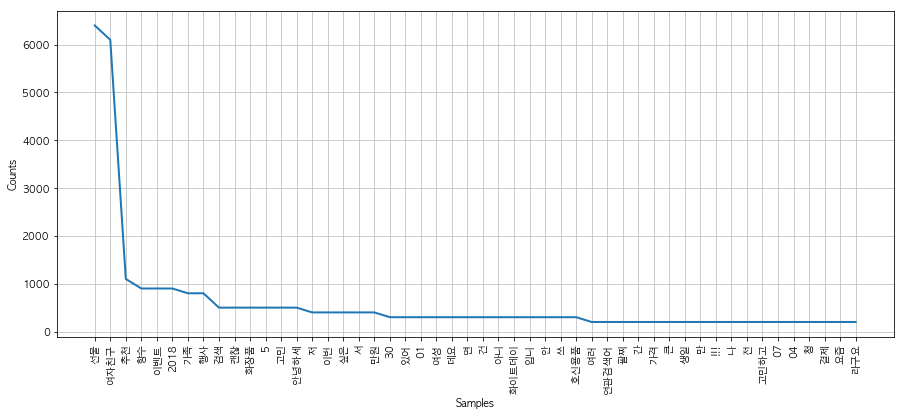

In [124]:
plt.figure(figsize=(15,6))
ko.plot(50)
plt.show()

In [126]:
from wordcloud import WordCloud, STOPWORDS
from PIL import Image

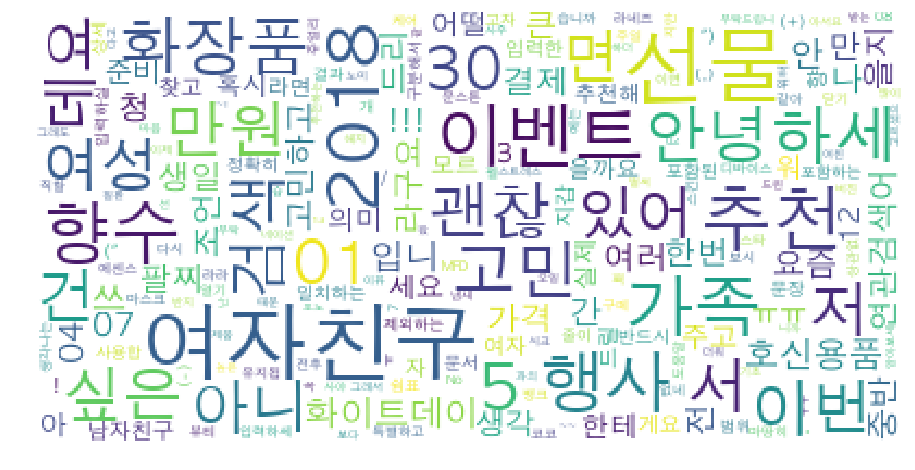

In [127]:
data = ko.vocab().most_common(300)

# for win : font_path='c:/Windows/Fonts/malgun.ttf'
wordcloud = WordCloud(font_path='/Library/Fonts/AppleGothic.ttf',
                      relative_scaling = 0.2,
                      #stopwords=STOPWORDS,
                      background_color='white',
                      ).generate_from_frequencies(dict(data))
plt.figure(figsize=(16,8))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

In [128]:
mask = np.array(Image.open('../data/09. heart.jpg'))

from wordcloud import ImageColorGenerator

image_colors = ImageColorGenerator(mask)

In [129]:
data = ko.vocab().most_common(200)

# for win : font_path='c:/Windows/Fonts/malgun.ttf'
wordcloud = WordCloud(font_path='/Library/Fonts/AppleGothic.ttf',
               relative_scaling = 0.1, mask=mask,
               background_color = 'white',
               min_font_size=1,
               max_font_size=100).generate_from_frequencies(dict(data))

default_colors = wordcloud.to_array()

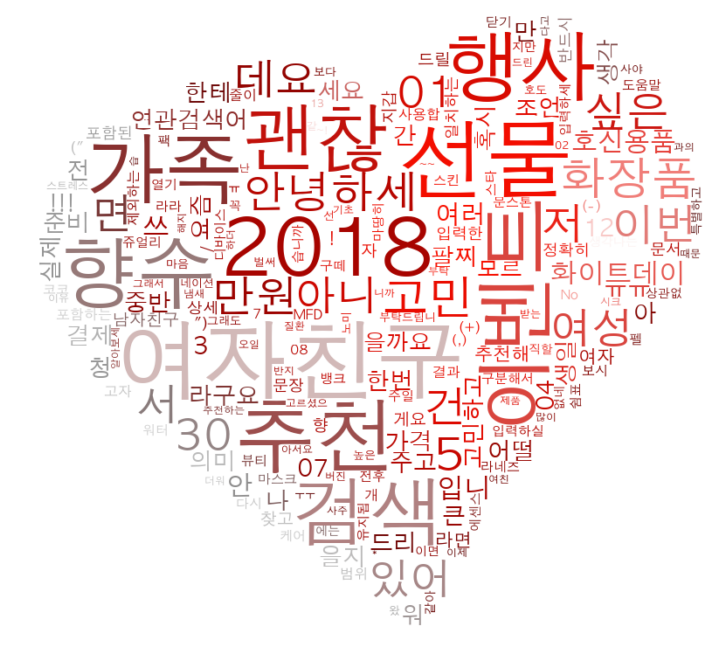

In [130]:
plt.figure(figsize=(12,12))
plt.imshow(wordcloud.recolor(color_func=image_colors), interpolation='bilinear')
plt.axis('off')
plt.show()

In [131]:
import gensim
from gensim.models import word2vec

In [133]:
twitter = Twitter()
results = []
lines = present_candi_text

for line in lines:
    malist = twitter.pos(line, norm=True, stem=True)
    r = []
    
    for word in malist:
        if not word[1] in ['Josa', 'Eomi', 'Punctuation']:
            r.append(word[0])
    
    r1 = (" ".join(r)).strip()
    results.append(r1)
    print(r1)

기본 검색 입력 하다 단어 하나 이상 포함 되다 문서 검색
상세 검색 정확하다 일치 하다 단어 문장 반드시 포함 하다 단어 제외 하다 단어 기본 검색 결과 범위 줄이다 하다 때 사용 하다 여러 개 단어 입력 하다 때 쉼표 로 구분 하다 입력 하다
연관검색어 도움말 여자친구 선물 구떼 향수 No 7 코코 스타 마스크 팩 여자친구 선물 뷰티 디바이스 라라 펠 쥬얼리 문스톤 30 대다 여자친구 선물 MFD 팔찌 이벤트 스킨 케어 20 대다 여자친구 선물 라네즈 워터 뱅크 에센스 닫다 후 1 주일 간 유지 되다 연관검색어 다시 보다 열기
질문 30 대다 전후 여자친구 선물 괜찮다 거 있다 2018 08 01 마땅하다 생각나다 여자친구 선물 없다 ㅠ 저 가격 크다 상관없다 이번 생일 특별하다 간 직할 만 여자친구 선물 이면 좋다 같다 추천 좀 꼭 부탁드리다 답변 벌써 여자친구 선물 사다 하다 때 오다 그래도 마음 보다 여자친구 선물 높다 선 호도 있다 전 노미 네이션 여자친구 선물 추천 하다 이유 여친 반지 팔찌 답변 수 1
질문 여자친구 선물 고민 하다 있다 2018 07 04 여자친구 선물 여성 청 결제 사주 싶다 요즘 여성 질환 때문 스트레스 많이 받다 것 같다 이제 덥다 습 해지 냄새 나다 하다 그래서 답변 ㅜㅜ 여자친구 선물 시크 버진 오일 추천 드리다 싶다 여자친구 선물 자다 고르셨으 좋다 제 추천 드리다 제품 한번 알아보다 여자친구 선물 여성 청 결제 기초 화장품 답변 수 2
질문 20 대다 여자친구 선물 조언 부탁 2018 02 13 다르다 아니다 20 대다 여자친구 선물 무엇 해주다 좋다 조언 부탁드리다 20 대다 초반 20 대다 여자친구 선물 아직 대학생 20 대다 여자친구 선물 크다 돈 답변 20 대다 여자친구 선물 생각 하다 계시 봐 저 20 대다 중반 20 대다 여자친구 선물 뭐 있다 생각 해보다 20 대다 여자친구 선물 화장품 해보다 심 어떻다 생각 드네 가족 행사 이벤트 답변 수 1
질문 여자친구 선물 화이트데이 준비 중 2018 03 10 

질문 여자친구 선물 고민 하다 있다 2018 07 04 여자친구 선물 여성 청 결제 사주 싶다 요즘 여성 질환 때문 스트레스 많이 받다 것 같다 이제 덥다 습 해지 냄새 나다 하다 그래서 답변 ㅜㅜ 여자친구 선물 시크 버진 오일 추천 드리다 싶다 여자친구 선물 자다 고르셨으 좋다 제 추천 드리다 제품 한번 알아보다 여자친구 선물 여성 청 결제 기초 화장품 답변 수 2
질문 20 대다 여자친구 선물 조언 부탁 2018 02 13 다르다 아니다 20 대다 여자친구 선물 무엇 해주다 좋다 조언 부탁드리다 20 대다 초반 20 대다 여자친구 선물 아직 대학생 20 대다 여자친구 선물 크다 돈 답변 20 대다 여자친구 선물 생각 하다 계시 봐 저 20 대다 중반 20 대다 여자친구 선물 뭐 있다 생각 해보다 20 대다 여자친구 선물 화장품 해보다 심 어떻다 생각 드네 가족 행사 이벤트 답변 수 1
질문 여자친구 선물 화이트데이 준비 중 2018 03 10 화이트데이 줄 여자친구 선물 준비 중 이다 여자친구 선물 뭐 좋다 팁 좀 저번 발렌타인데이 때 워낙 거 하다 챙기다 받다 가지 이번 화이트데이 여자친구 선물 답변 제 이번 생일 준 여자친구 선물 천연 성분 만들어지다 화장품 이다 여자친구 선물 화장품 처음 주다 보다 거 이다 누나 물어보다 여자친구 선물 살 가족 행사 이벤트 답변 수 5
질문 여자친구 선물 알다 2017 12 31 여자친구 선물 주다 싶다 기준 까다 워 의미 있다 여자친구 선물 정도 하나 주다 싶다 고민 점점 깊다 ㅠㅠ 30 대다 여자친구 선물 좋다 거 답변 우와 아 이렇게 고심 여자친구 선물 여자친구 선물 고민 해드리다 혹시 악세 서리 자다 안 것 여자친구 선물 되게 괜찮다 실제 저 여사 친 들 가족 행사 이벤트 답변 수 3
질문 20 대다 여자친구 선물 어떻다 좋다 2018 01 24 안녕하다 20 대다 여자친구 선물 고민 중 이다 어떻다 걸 골르다 야하다 모르다 가격 10 만원 안 넘어가다 루 20 대다 여자친구 선물 추천 하다 답변 안녕하다 20

질문 여자친구 선물 고민 하다 있다 2018 07 04 여자친구 선물 여성 청 결제 사주 싶다 요즘 여성 질환 때문 스트레스 많이 받다 것 같다 이제 덥다 습 해지 냄새 나다 하다 그래서 답변 ㅜㅜ 여자친구 선물 시크 버진 오일 추천 드리다 싶다 여자친구 선물 자다 고르셨으 좋다 제 추천 드리다 제품 한번 알아보다 여자친구 선물 여성 청 결제 기초 화장품 답변 수 2
질문 20 대다 여자친구 선물 조언 부탁 2018 02 13 다르다 아니다 20 대다 여자친구 선물 무엇 해주다 좋다 조언 부탁드리다 20 대다 초반 20 대다 여자친구 선물 아직 대학생 20 대다 여자친구 선물 크다 돈 답변 20 대다 여자친구 선물 생각 하다 계시 봐 저 20 대다 중반 20 대다 여자친구 선물 뭐 있다 생각 해보다 20 대다 여자친구 선물 화장품 해보다 심 어떻다 생각 드네 가족 행사 이벤트 답변 수 1
질문 여자친구 선물 화이트데이 준비 중 2018 03 10 화이트데이 줄 여자친구 선물 준비 중 이다 여자친구 선물 뭐 좋다 팁 좀 저번 발렌타인데이 때 워낙 거 하다 챙기다 받다 가지 이번 화이트데이 여자친구 선물 답변 제 이번 생일 준 여자친구 선물 천연 성분 만들어지다 화장품 이다 여자친구 선물 화장품 처음 주다 보다 거 이다 누나 물어보다 여자친구 선물 살 가족 행사 이벤트 답변 수 5
질문 여자친구 선물 알다 2017 12 31 여자친구 선물 주다 싶다 기준 까다 워 의미 있다 여자친구 선물 정도 하나 주다 싶다 고민 점점 깊다 ㅠㅠ 30 대다 여자친구 선물 좋다 거 답변 우와 아 이렇게 고심 여자친구 선물 여자친구 선물 고민 해드리다 혹시 악세 서리 자다 안 것 여자친구 선물 되게 괜찮다 실제 저 여사 친 들 가족 행사 이벤트 답변 수 3
질문 20 대다 여자친구 선물 어떻다 좋다 2018 01 24 안녕하다 20 대다 여자친구 선물 고민 중 이다 어떻다 걸 골르다 야하다 모르다 가격 10 만원 안 넘어가다 루 20 대다 여자친구 선물 추천 하다 답변 안녕하다 20

질문 여자친구 선물 추천 좀 2018 04 12 향수 옷 가방 화장품 중 고민 하다 너무 많다 뭘살 모르다 ㅠㅠ 여자친구 선물 검색 하다 광범위 추천 좀 받다 하다 여자친구 선물 좀 추천 하다 답변 이렇다 괜찮다 지갑 매드 고트 장 지갑 좋다 보이다 안녕하다 여자친구 선물 구경 줄다 ♡♡ 여자친구 선물 추천 드릴 향 달콤하다 딸기 향 가족 행사 이벤트 답변 수 8
기본 검색 입력 하다 단어 하나 이상 포함 되다 문서 검색
상세 검색 정확하다 일치 하다 단어 문장 반드시 포함 하다 단어 제외 하다 단어 기본 검색 결과 범위 줄이다 하다 때 사용 하다 여러 개 단어 입력 하다 때 쉼표 로 구분 하다 입력 하다
연관검색어 도움말 여자친구 선물 구떼 향수 No 7 코코 스타 마스크 팩 여자친구 선물 뷰티 디바이스 라라 펠 쥬얼리 문스톤 30 대다 여자친구 선물 MFD 팔찌 이벤트 스킨 케어 20 대다 여자친구 선물 라네즈 워터 뱅크 에센스 닫다 후 1 주일 간 유지 되다 연관검색어 다시 보다 열기
질문 30 대다 전후 여자친구 선물 괜찮다 거 있다 2018 08 01 마땅하다 생각나다 여자친구 선물 없다 ㅠ 저 가격 크다 상관없다 이번 생일 특별하다 간 직할 만 여자친구 선물 이면 좋다 같다 추천 좀 꼭 부탁드리다 답변 벌써 여자친구 선물 사다 하다 때 오다 그래도 마음 보다 여자친구 선물 높다 선 호도 있다 전 노미 네이션 여자친구 선물 추천 하다 이유 여친 반지 팔찌 답변 수 1
질문 여자친구 선물 고민 하다 있다 2018 07 04 여자친구 선물 여성 청 결제 사주 싶다 요즘 여성 질환 때문 스트레스 많이 받다 것 같다 이제 덥다 습 해지 냄새 나다 하다 그래서 답변 ㅜㅜ 여자친구 선물 시크 버진 오일 추천 드리다 싶다 여자친구 선물 자다 고르셨으 좋다 제 추천 드리다 제품 한번 알아보다 여자친구 선물 여성 청 결제 기초 화장품 답변 수 2
질문 20 대다 여자친구 선물 조언 부탁 2018 02 13 다르다 아니다 20 대다 여자친구 선물 무엇 해주다 좋다 조언

질문 20 대다 여자친구 선물 어떻다 좋다 2018 01 24 안녕하다 20 대다 여자친구 선물 고민 중 이다 어떻다 걸 골르다 야하다 모르다 가격 10 만원 안 넘어가다 루 20 대다 여자친구 선물 추천 하다 답변 안녕하다 20 대다 여자친구 선물 대하다 문의 주다 먼저 20 대다 여자친구 선물 여러 모로 의미 깊다 20 대다 여자친구 선물 향수 추천 드리다 좋다 향기 가족 행사 이벤트 답변 수 2
질문 여자친구 선물 가볍다 2018 01 06 여자친구 가볍다 선물 여자친구 선물 해주다 하다 괜찮다 여자친구 선물 어떻다 있다 있다 여자친구 선물 추천 좀 해주다 여자친구 선물 답변 선물 하다 여자친구 선물 고민 이 라면 향수 어떻다 해 특별하다 날 아니다 여자친구 선물 얼마 전 여자친구 선물 향수 선물 하다 여자 향수 추천 가족 행사 이벤트 답변 수 3
질문 여자친구 선물 고민 2018 07 10 요즘 밤길 흉흉 한 데 집 갈다 때 마다 무섭다 전화 하다 안 쓰다 워 여자친구 선물 호신용품 사 주다 혹시 여자 쓰기 괜찮다 호신용품 뭐 있다 전기충격기 답변 오 ㅎㅎ 제 남자친구 같다 분 또 있다 ㅋㅋ 제 쓰다 있다 호신용품 추천 드리다 저 제 사다 아니다 남자친구 선물 해주다 아주 자다 쓰다 있다 실제 가족 행사 이벤트 답변 수 1
질문 5 만원 대 선물 여자친구 선물 2018 06 25 안녕하다 20 대다 중반 남성 이다 5 만원 대 선물 간단하다 여자친구 선물 해주다 싶다 향수 바디 미스트 뿌리다 이번 향수 찾다 같다 비싸다 답변 안녕하다 질문 자 님 5 만원 대 선물 찾다 계시다 질문 답변 한번 해드리다 ㅎㅎ 1 여자친구 정말 착하다 순수하다 친구 어울리다 향수 추천 좀 가족 행사 이벤트 답변 수 5
질문 여자친구 선물 추천 좀 2018 04 12 향수 옷 가방 화장품 중 고민 하다 너무 많다 뭘살 모르다 ㅠㅠ 여자친구 선물 검색 하다 광범위 추천 좀 받다 하다 여자친구 선물 좀 추천 하다 답변 이렇다 괜찮다 지갑 매드 고트 장 지갑 좋다 보이다 안녕하다 

질문 여자친구 선물 고민 2018 07 10 요즘 밤길 흉흉 한 데 집 갈다 때 마다 무섭다 전화 하다 안 쓰다 워 여자친구 선물 호신용품 사 주다 혹시 여자 쓰기 괜찮다 호신용품 뭐 있다 전기충격기 답변 오 ㅎㅎ 제 남자친구 같다 분 또 있다 ㅋㅋ 제 쓰다 있다 호신용품 추천 드리다 저 제 사다 아니다 남자친구 선물 해주다 아주 자다 쓰다 있다 실제 가족 행사 이벤트 답변 수 1
질문 5 만원 대 선물 여자친구 선물 2018 06 25 안녕하다 20 대다 중반 남성 이다 5 만원 대 선물 간단하다 여자친구 선물 해주다 싶다 향수 바디 미스트 뿌리다 이번 향수 찾다 같다 비싸다 답변 안녕하다 질문 자 님 5 만원 대 선물 찾다 계시다 질문 답변 한번 해드리다 ㅎㅎ 1 여자친구 정말 착하다 순수하다 친구 어울리다 향수 추천 좀 가족 행사 이벤트 답변 수 5
질문 여자친구 선물 추천 좀 2018 04 12 향수 옷 가방 화장품 중 고민 하다 너무 많다 뭘살 모르다 ㅠㅠ 여자친구 선물 검색 하다 광범위 추천 좀 받다 하다 여자친구 선물 좀 추천 하다 답변 이렇다 괜찮다 지갑 매드 고트 장 지갑 좋다 보이다 안녕하다 여자친구 선물 구경 줄다 ♡♡ 여자친구 선물 추천 드릴 향 달콤하다 딸기 향 가족 행사 이벤트 답변 수 8
기본 검색 입력 하다 단어 하나 이상 포함 되다 문서 검색
상세 검색 정확하다 일치 하다 단어 문장 반드시 포함 하다 단어 제외 하다 단어 기본 검색 결과 범위 줄이다 하다 때 사용 하다 여러 개 단어 입력 하다 때 쉼표 로 구분 하다 입력 하다
연관검색어 도움말 여자친구 선물 구떼 향수 No 7 코코 스타 마스크 팩 여자친구 선물 뷰티 디바이스 라라 펠 쥬얼리 문스톤 30 대다 여자친구 선물 MFD 팔찌 이벤트 스킨 케어 20 대다 여자친구 선물 라네즈 워터 뱅크 에센스 닫다 후 1 주일 간 유지 되다 연관검색어 다시 보다 열기
질문 30 대다 전후 여자친구 선물 괜찮다 거 있다 2018 08 01 마땅하다 생각나다 여자친구 선물 없다 ㅠ 저 가격

질문 여자친구 선물 고민 하다 있다 2018 07 04 여자친구 선물 여성 청 결제 사주 싶다 요즘 여성 질환 때문 스트레스 많이 받다 것 같다 이제 덥다 습 해지 냄새 나다 하다 그래서 답변 ㅜㅜ 여자친구 선물 시크 버진 오일 추천 드리다 싶다 여자친구 선물 자다 고르셨으 좋다 제 추천 드리다 제품 한번 알아보다 여자친구 선물 여성 청 결제 기초 화장품 답변 수 2
질문 20 대다 여자친구 선물 조언 부탁 2018 02 13 다르다 아니다 20 대다 여자친구 선물 무엇 해주다 좋다 조언 부탁드리다 20 대다 초반 20 대다 여자친구 선물 아직 대학생 20 대다 여자친구 선물 크다 돈 답변 20 대다 여자친구 선물 생각 하다 계시 봐 저 20 대다 중반 20 대다 여자친구 선물 뭐 있다 생각 해보다 20 대다 여자친구 선물 화장품 해보다 심 어떻다 생각 드네 가족 행사 이벤트 답변 수 1
질문 여자친구 선물 화이트데이 준비 중 2018 03 10 화이트데이 줄 여자친구 선물 준비 중 이다 여자친구 선물 뭐 좋다 팁 좀 저번 발렌타인데이 때 워낙 거 하다 챙기다 받다 가지 이번 화이트데이 여자친구 선물 답변 제 이번 생일 준 여자친구 선물 천연 성분 만들어지다 화장품 이다 여자친구 선물 화장품 처음 주다 보다 거 이다 누나 물어보다 여자친구 선물 살 가족 행사 이벤트 답변 수 5
질문 여자친구 선물 알다 2017 12 31 여자친구 선물 주다 싶다 기준 까다 워 의미 있다 여자친구 선물 정도 하나 주다 싶다 고민 점점 깊다 ㅠㅠ 30 대다 여자친구 선물 좋다 거 답변 우와 아 이렇게 고심 여자친구 선물 여자친구 선물 고민 해드리다 혹시 악세 서리 자다 안 것 여자친구 선물 되게 괜찮다 실제 저 여사 친 들 가족 행사 이벤트 답변 수 3
질문 20 대다 여자친구 선물 어떻다 좋다 2018 01 24 안녕하다 20 대다 여자친구 선물 고민 중 이다 어떻다 걸 골르다 야하다 모르다 가격 10 만원 안 넘어가다 루 20 대다 여자친구 선물 추천 하다 답변 안녕하다 20

질문 여자친구 선물 추천 좀 2018 04 12 향수 옷 가방 화장품 중 고민 하다 너무 많다 뭘살 모르다 ㅠㅠ 여자친구 선물 검색 하다 광범위 추천 좀 받다 하다 여자친구 선물 좀 추천 하다 답변 이렇다 괜찮다 지갑 매드 고트 장 지갑 좋다 보이다 안녕하다 여자친구 선물 구경 줄다 ♡♡ 여자친구 선물 추천 드릴 향 달콤하다 딸기 향 가족 행사 이벤트 답변 수 8
기본 검색 입력 하다 단어 하나 이상 포함 되다 문서 검색
상세 검색 정확하다 일치 하다 단어 문장 반드시 포함 하다 단어 제외 하다 단어 기본 검색 결과 범위 줄이다 하다 때 사용 하다 여러 개 단어 입력 하다 때 쉼표 로 구분 하다 입력 하다
연관검색어 도움말 여자친구 선물 구떼 향수 No 7 코코 스타 마스크 팩 여자친구 선물 뷰티 디바이스 라라 펠 쥬얼리 문스톤 30 대다 여자친구 선물 MFD 팔찌 이벤트 스킨 케어 20 대다 여자친구 선물 라네즈 워터 뱅크 에센스 닫다 후 1 주일 간 유지 되다 연관검색어 다시 보다 열기
질문 30 대다 전후 여자친구 선물 괜찮다 거 있다 2018 08 01 마땅하다 생각나다 여자친구 선물 없다 ㅠ 저 가격 크다 상관없다 이번 생일 특별하다 간 직할 만 여자친구 선물 이면 좋다 같다 추천 좀 꼭 부탁드리다 답변 벌써 여자친구 선물 사다 하다 때 오다 그래도 마음 보다 여자친구 선물 높다 선 호도 있다 전 노미 네이션 여자친구 선물 추천 하다 이유 여친 반지 팔찌 답변 수 1
질문 여자친구 선물 고민 하다 있다 2018 07 04 여자친구 선물 여성 청 결제 사주 싶다 요즘 여성 질환 때문 스트레스 많이 받다 것 같다 이제 덥다 습 해지 냄새 나다 하다 그래서 답변 ㅜㅜ 여자친구 선물 시크 버진 오일 추천 드리다 싶다 여자친구 선물 자다 고르셨으 좋다 제 추천 드리다 제품 한번 알아보다 여자친구 선물 여성 청 결제 기초 화장품 답변 수 2
질문 20 대다 여자친구 선물 조언 부탁 2018 02 13 다르다 아니다 20 대다 여자친구 선물 무엇 해주다 좋다 조언

연관검색어 도움말 여자친구 선물 구떼 향수 No 7 코코 스타 마스크 팩 여자친구 선물 뷰티 디바이스 라라 펠 쥬얼리 문스톤 30 대다 여자친구 선물 MFD 팔찌 이벤트 스킨 케어 20 대다 여자친구 선물 라네즈 워터 뱅크 에센스 닫다 후 1 주일 간 유지 되다 연관검색어 다시 보다 열기
질문 30 대다 전후 여자친구 선물 괜찮다 거 있다 2018 08 01 마땅하다 생각나다 여자친구 선물 없다 ㅠ 저 가격 크다 상관없다 이번 생일 특별하다 간 직할 만 여자친구 선물 이면 좋다 같다 추천 좀 꼭 부탁드리다 답변 벌써 여자친구 선물 사다 하다 때 오다 그래도 마음 보다 여자친구 선물 높다 선 호도 있다 전 노미 네이션 여자친구 선물 추천 하다 이유 여친 반지 팔찌 답변 수 1
질문 여자친구 선물 고민 하다 있다 2018 07 04 여자친구 선물 여성 청 결제 사주 싶다 요즘 여성 질환 때문 스트레스 많이 받다 것 같다 이제 덥다 습 해지 냄새 나다 하다 그래서 답변 ㅜㅜ 여자친구 선물 시크 버진 오일 추천 드리다 싶다 여자친구 선물 자다 고르셨으 좋다 제 추천 드리다 제품 한번 알아보다 여자친구 선물 여성 청 결제 기초 화장품 답변 수 2
질문 20 대다 여자친구 선물 조언 부탁 2018 02 13 다르다 아니다 20 대다 여자친구 선물 무엇 해주다 좋다 조언 부탁드리다 20 대다 초반 20 대다 여자친구 선물 아직 대학생 20 대다 여자친구 선물 크다 돈 답변 20 대다 여자친구 선물 생각 하다 계시 봐 저 20 대다 중반 20 대다 여자친구 선물 뭐 있다 생각 해보다 20 대다 여자친구 선물 화장품 해보다 심 어떻다 생각 드네 가족 행사 이벤트 답변 수 1
질문 여자친구 선물 화이트데이 준비 중 2018 03 10 화이트데이 줄 여자친구 선물 준비 중 이다 여자친구 선물 뭐 좋다 팁 좀 저번 발렌타인데이 때 워낙 거 하다 챙기다 받다 가지 이번 화이트데이 여자친구 선물 답변 제 이번 생일 준 여자친구 선물 천연 성분 만들어지다 화장품 이다 여자친구 선물 화장

질문 20 대다 여자친구 선물 조언 부탁 2018 02 13 다르다 아니다 20 대다 여자친구 선물 무엇 해주다 좋다 조언 부탁드리다 20 대다 초반 20 대다 여자친구 선물 아직 대학생 20 대다 여자친구 선물 크다 돈 답변 20 대다 여자친구 선물 생각 하다 계시 봐 저 20 대다 중반 20 대다 여자친구 선물 뭐 있다 생각 해보다 20 대다 여자친구 선물 화장품 해보다 심 어떻다 생각 드네 가족 행사 이벤트 답변 수 1
질문 여자친구 선물 화이트데이 준비 중 2018 03 10 화이트데이 줄 여자친구 선물 준비 중 이다 여자친구 선물 뭐 좋다 팁 좀 저번 발렌타인데이 때 워낙 거 하다 챙기다 받다 가지 이번 화이트데이 여자친구 선물 답변 제 이번 생일 준 여자친구 선물 천연 성분 만들어지다 화장품 이다 여자친구 선물 화장품 처음 주다 보다 거 이다 누나 물어보다 여자친구 선물 살 가족 행사 이벤트 답변 수 5
질문 여자친구 선물 알다 2017 12 31 여자친구 선물 주다 싶다 기준 까다 워 의미 있다 여자친구 선물 정도 하나 주다 싶다 고민 점점 깊다 ㅠㅠ 30 대다 여자친구 선물 좋다 거 답변 우와 아 이렇게 고심 여자친구 선물 여자친구 선물 고민 해드리다 혹시 악세 서리 자다 안 것 여자친구 선물 되게 괜찮다 실제 저 여사 친 들 가족 행사 이벤트 답변 수 3
질문 20 대다 여자친구 선물 어떻다 좋다 2018 01 24 안녕하다 20 대다 여자친구 선물 고민 중 이다 어떻다 걸 골르다 야하다 모르다 가격 10 만원 안 넘어가다 루 20 대다 여자친구 선물 추천 하다 답변 안녕하다 20 대다 여자친구 선물 대하다 문의 주다 먼저 20 대다 여자친구 선물 여러 모로 의미 깊다 20 대다 여자친구 선물 향수 추천 드리다 좋다 향기 가족 행사 이벤트 답변 수 2
질문 여자친구 선물 가볍다 2018 01 06 여자친구 가볍다 선물 여자친구 선물 해주다 하다 괜찮다 여자친구 선물 어떻다 있다 있다 여자친구 선물 추천 좀 해주다 여자친구 선물 답변 선물 하다 

질문 여자친구 선물 추천 좀 2018 04 12 향수 옷 가방 화장품 중 고민 하다 너무 많다 뭘살 모르다 ㅠㅠ 여자친구 선물 검색 하다 광범위 추천 좀 받다 하다 여자친구 선물 좀 추천 하다 답변 이렇다 괜찮다 지갑 매드 고트 장 지갑 좋다 보이다 안녕하다 여자친구 선물 구경 줄다 ♡♡ 여자친구 선물 추천 드릴 향 달콤하다 딸기 향 가족 행사 이벤트 답변 수 8
기본 검색 입력 하다 단어 하나 이상 포함 되다 문서 검색
상세 검색 정확하다 일치 하다 단어 문장 반드시 포함 하다 단어 제외 하다 단어 기본 검색 결과 범위 줄이다 하다 때 사용 하다 여러 개 단어 입력 하다 때 쉼표 로 구분 하다 입력 하다
연관검색어 도움말 여자친구 선물 구떼 향수 No 7 코코 스타 마스크 팩 여자친구 선물 뷰티 디바이스 라라 펠 쥬얼리 문스톤 30 대다 여자친구 선물 MFD 팔찌 이벤트 스킨 케어 20 대다 여자친구 선물 라네즈 워터 뱅크 에센스 닫다 후 1 주일 간 유지 되다 연관검색어 다시 보다 열기
질문 30 대다 전후 여자친구 선물 괜찮다 거 있다 2018 08 01 마땅하다 생각나다 여자친구 선물 없다 ㅠ 저 가격 크다 상관없다 이번 생일 특별하다 간 직할 만 여자친구 선물 이면 좋다 같다 추천 좀 꼭 부탁드리다 답변 벌써 여자친구 선물 사다 하다 때 오다 그래도 마음 보다 여자친구 선물 높다 선 호도 있다 전 노미 네이션 여자친구 선물 추천 하다 이유 여친 반지 팔찌 답변 수 1
질문 여자친구 선물 고민 하다 있다 2018 07 04 여자친구 선물 여성 청 결제 사주 싶다 요즘 여성 질환 때문 스트레스 많이 받다 것 같다 이제 덥다 습 해지 냄새 나다 하다 그래서 답변 ㅜㅜ 여자친구 선물 시크 버진 오일 추천 드리다 싶다 여자친구 선물 자다 고르셨으 좋다 제 추천 드리다 제품 한번 알아보다 여자친구 선물 여성 청 결제 기초 화장품 답변 수 2
질문 20 대다 여자친구 선물 조언 부탁 2018 02 13 다르다 아니다 20 대다 여자친구 선물 무엇 해주다 좋다 조언

질문 5 만원 대 선물 여자친구 선물 2018 06 25 안녕하다 20 대다 중반 남성 이다 5 만원 대 선물 간단하다 여자친구 선물 해주다 싶다 향수 바디 미스트 뿌리다 이번 향수 찾다 같다 비싸다 답변 안녕하다 질문 자 님 5 만원 대 선물 찾다 계시다 질문 답변 한번 해드리다 ㅎㅎ 1 여자친구 정말 착하다 순수하다 친구 어울리다 향수 추천 좀 가족 행사 이벤트 답변 수 5
질문 여자친구 선물 추천 좀 2018 04 12 향수 옷 가방 화장품 중 고민 하다 너무 많다 뭘살 모르다 ㅠㅠ 여자친구 선물 검색 하다 광범위 추천 좀 받다 하다 여자친구 선물 좀 추천 하다 답변 이렇다 괜찮다 지갑 매드 고트 장 지갑 좋다 보이다 안녕하다 여자친구 선물 구경 줄다 ♡♡ 여자친구 선물 추천 드릴 향 달콤하다 딸기 향 가족 행사 이벤트 답변 수 8
기본 검색 입력 하다 단어 하나 이상 포함 되다 문서 검색
상세 검색 정확하다 일치 하다 단어 문장 반드시 포함 하다 단어 제외 하다 단어 기본 검색 결과 범위 줄이다 하다 때 사용 하다 여러 개 단어 입력 하다 때 쉼표 로 구분 하다 입력 하다
연관검색어 도움말 여자친구 선물 구떼 향수 No 7 코코 스타 마스크 팩 여자친구 선물 뷰티 디바이스 라라 펠 쥬얼리 문스톤 30 대다 여자친구 선물 MFD 팔찌 이벤트 스킨 케어 20 대다 여자친구 선물 라네즈 워터 뱅크 에센스 닫다 후 1 주일 간 유지 되다 연관검색어 다시 보다 열기
질문 30 대다 전후 여자친구 선물 괜찮다 거 있다 2018 08 01 마땅하다 생각나다 여자친구 선물 없다 ㅠ 저 가격 크다 상관없다 이번 생일 특별하다 간 직할 만 여자친구 선물 이면 좋다 같다 추천 좀 꼭 부탁드리다 답변 벌써 여자친구 선물 사다 하다 때 오다 그래도 마음 보다 여자친구 선물 높다 선 호도 있다 전 노미 네이션 여자친구 선물 추천 하다 이유 여친 반지 팔찌 답변 수 1
질문 여자친구 선물 고민 하다 있다 2018 07 04 여자친구 선물 여성 청 결제 사주 싶다 요즘 여성 질환 

질문 여자친구 선물 화이트데이 준비 중 2018 03 10 화이트데이 줄 여자친구 선물 준비 중 이다 여자친구 선물 뭐 좋다 팁 좀 저번 발렌타인데이 때 워낙 거 하다 챙기다 받다 가지 이번 화이트데이 여자친구 선물 답변 제 이번 생일 준 여자친구 선물 천연 성분 만들어지다 화장품 이다 여자친구 선물 화장품 처음 주다 보다 거 이다 누나 물어보다 여자친구 선물 살 가족 행사 이벤트 답변 수 5
질문 여자친구 선물 알다 2017 12 31 여자친구 선물 주다 싶다 기준 까다 워 의미 있다 여자친구 선물 정도 하나 주다 싶다 고민 점점 깊다 ㅠㅠ 30 대다 여자친구 선물 좋다 거 답변 우와 아 이렇게 고심 여자친구 선물 여자친구 선물 고민 해드리다 혹시 악세 서리 자다 안 것 여자친구 선물 되게 괜찮다 실제 저 여사 친 들 가족 행사 이벤트 답변 수 3
질문 20 대다 여자친구 선물 어떻다 좋다 2018 01 24 안녕하다 20 대다 여자친구 선물 고민 중 이다 어떻다 걸 골르다 야하다 모르다 가격 10 만원 안 넘어가다 루 20 대다 여자친구 선물 추천 하다 답변 안녕하다 20 대다 여자친구 선물 대하다 문의 주다 먼저 20 대다 여자친구 선물 여러 모로 의미 깊다 20 대다 여자친구 선물 향수 추천 드리다 좋다 향기 가족 행사 이벤트 답변 수 2
질문 여자친구 선물 가볍다 2018 01 06 여자친구 가볍다 선물 여자친구 선물 해주다 하다 괜찮다 여자친구 선물 어떻다 있다 있다 여자친구 선물 추천 좀 해주다 여자친구 선물 답변 선물 하다 여자친구 선물 고민 이 라면 향수 어떻다 해 특별하다 날 아니다 여자친구 선물 얼마 전 여자친구 선물 향수 선물 하다 여자 향수 추천 가족 행사 이벤트 답변 수 3
질문 여자친구 선물 고민 2018 07 10 요즘 밤길 흉흉 한 데 집 갈다 때 마다 무섭다 전화 하다 안 쓰다 워 여자친구 선물 호신용품 사 주다 혹시 여자 쓰기 괜찮다 호신용품 뭐 있다 전기충격기 답변 오 ㅎㅎ 제 남자친구 같다 분 또 있다 ㅋㅋ 제 쓰다 있다 

질문 여자친구 선물 추천 좀 2018 04 12 향수 옷 가방 화장품 중 고민 하다 너무 많다 뭘살 모르다 ㅠㅠ 여자친구 선물 검색 하다 광범위 추천 좀 받다 하다 여자친구 선물 좀 추천 하다 답변 이렇다 괜찮다 지갑 매드 고트 장 지갑 좋다 보이다 안녕하다 여자친구 선물 구경 줄다 ♡♡ 여자친구 선물 추천 드릴 향 달콤하다 딸기 향 가족 행사 이벤트 답변 수 8
기본 검색 입력 하다 단어 하나 이상 포함 되다 문서 검색
상세 검색 정확하다 일치 하다 단어 문장 반드시 포함 하다 단어 제외 하다 단어 기본 검색 결과 범위 줄이다 하다 때 사용 하다 여러 개 단어 입력 하다 때 쉼표 로 구분 하다 입력 하다
연관검색어 도움말 여자친구 선물 구떼 향수 No 7 코코 스타 마스크 팩 여자친구 선물 뷰티 디바이스 라라 펠 쥬얼리 문스톤 30 대다 여자친구 선물 MFD 팔찌 이벤트 스킨 케어 20 대다 여자친구 선물 라네즈 워터 뱅크 에센스 닫다 후 1 주일 간 유지 되다 연관검색어 다시 보다 열기
질문 30 대다 전후 여자친구 선물 괜찮다 거 있다 2018 08 01 마땅하다 생각나다 여자친구 선물 없다 ㅠ 저 가격 크다 상관없다 이번 생일 특별하다 간 직할 만 여자친구 선물 이면 좋다 같다 추천 좀 꼭 부탁드리다 답변 벌써 여자친구 선물 사다 하다 때 오다 그래도 마음 보다 여자친구 선물 높다 선 호도 있다 전 노미 네이션 여자친구 선물 추천 하다 이유 여친 반지 팔찌 답변 수 1
질문 여자친구 선물 고민 하다 있다 2018 07 04 여자친구 선물 여성 청 결제 사주 싶다 요즘 여성 질환 때문 스트레스 많이 받다 것 같다 이제 덥다 습 해지 냄새 나다 하다 그래서 답변 ㅜㅜ 여자친구 선물 시크 버진 오일 추천 드리다 싶다 여자친구 선물 자다 고르셨으 좋다 제 추천 드리다 제품 한번 알아보다 여자친구 선물 여성 청 결제 기초 화장품 답변 수 2
질문 20 대다 여자친구 선물 조언 부탁 2018 02 13 다르다 아니다 20 대다 여자친구 선물 무엇 해주다 좋다 조언

질문 20 대다 여자친구 선물 어떻다 좋다 2018 01 24 안녕하다 20 대다 여자친구 선물 고민 중 이다 어떻다 걸 골르다 야하다 모르다 가격 10 만원 안 넘어가다 루 20 대다 여자친구 선물 추천 하다 답변 안녕하다 20 대다 여자친구 선물 대하다 문의 주다 먼저 20 대다 여자친구 선물 여러 모로 의미 깊다 20 대다 여자친구 선물 향수 추천 드리다 좋다 향기 가족 행사 이벤트 답변 수 2
질문 여자친구 선물 가볍다 2018 01 06 여자친구 가볍다 선물 여자친구 선물 해주다 하다 괜찮다 여자친구 선물 어떻다 있다 있다 여자친구 선물 추천 좀 해주다 여자친구 선물 답변 선물 하다 여자친구 선물 고민 이 라면 향수 어떻다 해 특별하다 날 아니다 여자친구 선물 얼마 전 여자친구 선물 향수 선물 하다 여자 향수 추천 가족 행사 이벤트 답변 수 3
질문 여자친구 선물 고민 2018 07 10 요즘 밤길 흉흉 한 데 집 갈다 때 마다 무섭다 전화 하다 안 쓰다 워 여자친구 선물 호신용품 사 주다 혹시 여자 쓰기 괜찮다 호신용품 뭐 있다 전기충격기 답변 오 ㅎㅎ 제 남자친구 같다 분 또 있다 ㅋㅋ 제 쓰다 있다 호신용품 추천 드리다 저 제 사다 아니다 남자친구 선물 해주다 아주 자다 쓰다 있다 실제 가족 행사 이벤트 답변 수 1
질문 5 만원 대 선물 여자친구 선물 2018 06 25 안녕하다 20 대다 중반 남성 이다 5 만원 대 선물 간단하다 여자친구 선물 해주다 싶다 향수 바디 미스트 뿌리다 이번 향수 찾다 같다 비싸다 답변 안녕하다 질문 자 님 5 만원 대 선물 찾다 계시다 질문 답변 한번 해드리다 ㅎㅎ 1 여자친구 정말 착하다 순수하다 친구 어울리다 향수 추천 좀 가족 행사 이벤트 답변 수 5
질문 여자친구 선물 추천 좀 2018 04 12 향수 옷 가방 화장품 중 고민 하다 너무 많다 뭘살 모르다 ㅠㅠ 여자친구 선물 검색 하다 광범위 추천 좀 받다 하다 여자친구 선물 좀 추천 하다 답변 이렇다 괜찮다 지갑 매드 고트 장 지갑 좋다 보이다 안녕하다 

질문 여자친구 선물 고민 하다 있다 2018 07 04 여자친구 선물 여성 청 결제 사주 싶다 요즘 여성 질환 때문 스트레스 많이 받다 것 같다 이제 덥다 습 해지 냄새 나다 하다 그래서 답변 ㅜㅜ 여자친구 선물 시크 버진 오일 추천 드리다 싶다 여자친구 선물 자다 고르셨으 좋다 제 추천 드리다 제품 한번 알아보다 여자친구 선물 여성 청 결제 기초 화장품 답변 수 2
질문 20 대다 여자친구 선물 조언 부탁 2018 02 13 다르다 아니다 20 대다 여자친구 선물 무엇 해주다 좋다 조언 부탁드리다 20 대다 초반 20 대다 여자친구 선물 아직 대학생 20 대다 여자친구 선물 크다 돈 답변 20 대다 여자친구 선물 생각 하다 계시 봐 저 20 대다 중반 20 대다 여자친구 선물 뭐 있다 생각 해보다 20 대다 여자친구 선물 화장품 해보다 심 어떻다 생각 드네 가족 행사 이벤트 답변 수 1
질문 여자친구 선물 화이트데이 준비 중 2018 03 10 화이트데이 줄 여자친구 선물 준비 중 이다 여자친구 선물 뭐 좋다 팁 좀 저번 발렌타인데이 때 워낙 거 하다 챙기다 받다 가지 이번 화이트데이 여자친구 선물 답변 제 이번 생일 준 여자친구 선물 천연 성분 만들어지다 화장품 이다 여자친구 선물 화장품 처음 주다 보다 거 이다 누나 물어보다 여자친구 선물 살 가족 행사 이벤트 답변 수 5
질문 여자친구 선물 알다 2017 12 31 여자친구 선물 주다 싶다 기준 까다 워 의미 있다 여자친구 선물 정도 하나 주다 싶다 고민 점점 깊다 ㅠㅠ 30 대다 여자친구 선물 좋다 거 답변 우와 아 이렇게 고심 여자친구 선물 여자친구 선물 고민 해드리다 혹시 악세 서리 자다 안 것 여자친구 선물 되게 괜찮다 실제 저 여사 친 들 가족 행사 이벤트 답변 수 3
질문 20 대다 여자친구 선물 어떻다 좋다 2018 01 24 안녕하다 20 대다 여자친구 선물 고민 중 이다 어떻다 걸 골르다 야하다 모르다 가격 10 만원 안 넘어가다 루 20 대다 여자친구 선물 추천 하다 답변 안녕하다 20

질문 20 대다 여자친구 선물 어떻다 좋다 2018 01 24 안녕하다 20 대다 여자친구 선물 고민 중 이다 어떻다 걸 골르다 야하다 모르다 가격 10 만원 안 넘어가다 루 20 대다 여자친구 선물 추천 하다 답변 안녕하다 20 대다 여자친구 선물 대하다 문의 주다 먼저 20 대다 여자친구 선물 여러 모로 의미 깊다 20 대다 여자친구 선물 향수 추천 드리다 좋다 향기 가족 행사 이벤트 답변 수 2
질문 여자친구 선물 가볍다 2018 01 06 여자친구 가볍다 선물 여자친구 선물 해주다 하다 괜찮다 여자친구 선물 어떻다 있다 있다 여자친구 선물 추천 좀 해주다 여자친구 선물 답변 선물 하다 여자친구 선물 고민 이 라면 향수 어떻다 해 특별하다 날 아니다 여자친구 선물 얼마 전 여자친구 선물 향수 선물 하다 여자 향수 추천 가족 행사 이벤트 답변 수 3
질문 여자친구 선물 고민 2018 07 10 요즘 밤길 흉흉 한 데 집 갈다 때 마다 무섭다 전화 하다 안 쓰다 워 여자친구 선물 호신용품 사 주다 혹시 여자 쓰기 괜찮다 호신용품 뭐 있다 전기충격기 답변 오 ㅎㅎ 제 남자친구 같다 분 또 있다 ㅋㅋ 제 쓰다 있다 호신용품 추천 드리다 저 제 사다 아니다 남자친구 선물 해주다 아주 자다 쓰다 있다 실제 가족 행사 이벤트 답변 수 1
질문 5 만원 대 선물 여자친구 선물 2018 06 25 안녕하다 20 대다 중반 남성 이다 5 만원 대 선물 간단하다 여자친구 선물 해주다 싶다 향수 바디 미스트 뿌리다 이번 향수 찾다 같다 비싸다 답변 안녕하다 질문 자 님 5 만원 대 선물 찾다 계시다 질문 답변 한번 해드리다 ㅎㅎ 1 여자친구 정말 착하다 순수하다 친구 어울리다 향수 추천 좀 가족 행사 이벤트 답변 수 5
질문 여자친구 선물 추천 좀 2018 04 12 향수 옷 가방 화장품 중 고민 하다 너무 많다 뭘살 모르다 ㅠㅠ 여자친구 선물 검색 하다 광범위 추천 좀 받다 하다 여자친구 선물 좀 추천 하다 답변 이렇다 괜찮다 지갑 매드 고트 장 지갑 좋다 보이다 안녕하다 

연관검색어 도움말 여자친구 선물 구떼 향수 No 7 코코 스타 마스크 팩 여자친구 선물 뷰티 디바이스 라라 펠 쥬얼리 문스톤 30 대다 여자친구 선물 MFD 팔찌 이벤트 스킨 케어 20 대다 여자친구 선물 라네즈 워터 뱅크 에센스 닫다 후 1 주일 간 유지 되다 연관검색어 다시 보다 열기
질문 30 대다 전후 여자친구 선물 괜찮다 거 있다 2018 08 01 마땅하다 생각나다 여자친구 선물 없다 ㅠ 저 가격 크다 상관없다 이번 생일 특별하다 간 직할 만 여자친구 선물 이면 좋다 같다 추천 좀 꼭 부탁드리다 답변 벌써 여자친구 선물 사다 하다 때 오다 그래도 마음 보다 여자친구 선물 높다 선 호도 있다 전 노미 네이션 여자친구 선물 추천 하다 이유 여친 반지 팔찌 답변 수 1
질문 여자친구 선물 고민 하다 있다 2018 07 04 여자친구 선물 여성 청 결제 사주 싶다 요즘 여성 질환 때문 스트레스 많이 받다 것 같다 이제 덥다 습 해지 냄새 나다 하다 그래서 답변 ㅜㅜ 여자친구 선물 시크 버진 오일 추천 드리다 싶다 여자친구 선물 자다 고르셨으 좋다 제 추천 드리다 제품 한번 알아보다 여자친구 선물 여성 청 결제 기초 화장품 답변 수 2
질문 20 대다 여자친구 선물 조언 부탁 2018 02 13 다르다 아니다 20 대다 여자친구 선물 무엇 해주다 좋다 조언 부탁드리다 20 대다 초반 20 대다 여자친구 선물 아직 대학생 20 대다 여자친구 선물 크다 돈 답변 20 대다 여자친구 선물 생각 하다 계시 봐 저 20 대다 중반 20 대다 여자친구 선물 뭐 있다 생각 해보다 20 대다 여자친구 선물 화장품 해보다 심 어떻다 생각 드네 가족 행사 이벤트 답변 수 1
질문 여자친구 선물 화이트데이 준비 중 2018 03 10 화이트데이 줄 여자친구 선물 준비 중 이다 여자친구 선물 뭐 좋다 팁 좀 저번 발렌타인데이 때 워낙 거 하다 챙기다 받다 가지 이번 화이트데이 여자친구 선물 답변 제 이번 생일 준 여자친구 선물 천연 성분 만들어지다 화장품 이다 여자친구 선물 화장

질문 20 대다 여자친구 선물 어떻다 좋다 2018 01 24 안녕하다 20 대다 여자친구 선물 고민 중 이다 어떻다 걸 골르다 야하다 모르다 가격 10 만원 안 넘어가다 루 20 대다 여자친구 선물 추천 하다 답변 안녕하다 20 대다 여자친구 선물 대하다 문의 주다 먼저 20 대다 여자친구 선물 여러 모로 의미 깊다 20 대다 여자친구 선물 향수 추천 드리다 좋다 향기 가족 행사 이벤트 답변 수 2
질문 여자친구 선물 가볍다 2018 01 06 여자친구 가볍다 선물 여자친구 선물 해주다 하다 괜찮다 여자친구 선물 어떻다 있다 있다 여자친구 선물 추천 좀 해주다 여자친구 선물 답변 선물 하다 여자친구 선물 고민 이 라면 향수 어떻다 해 특별하다 날 아니다 여자친구 선물 얼마 전 여자친구 선물 향수 선물 하다 여자 향수 추천 가족 행사 이벤트 답변 수 3
질문 여자친구 선물 고민 2018 07 10 요즘 밤길 흉흉 한 데 집 갈다 때 마다 무섭다 전화 하다 안 쓰다 워 여자친구 선물 호신용품 사 주다 혹시 여자 쓰기 괜찮다 호신용품 뭐 있다 전기충격기 답변 오 ㅎㅎ 제 남자친구 같다 분 또 있다 ㅋㅋ 제 쓰다 있다 호신용품 추천 드리다 저 제 사다 아니다 남자친구 선물 해주다 아주 자다 쓰다 있다 실제 가족 행사 이벤트 답변 수 1
질문 5 만원 대 선물 여자친구 선물 2018 06 25 안녕하다 20 대다 중반 남성 이다 5 만원 대 선물 간단하다 여자친구 선물 해주다 싶다 향수 바디 미스트 뿌리다 이번 향수 찾다 같다 비싸다 답변 안녕하다 질문 자 님 5 만원 대 선물 찾다 계시다 질문 답변 한번 해드리다 ㅎㅎ 1 여자친구 정말 착하다 순수하다 친구 어울리다 향수 추천 좀 가족 행사 이벤트 답변 수 5
질문 여자친구 선물 추천 좀 2018 04 12 향수 옷 가방 화장품 중 고민 하다 너무 많다 뭘살 모르다 ㅠㅠ 여자친구 선물 검색 하다 광범위 추천 좀 받다 하다 여자친구 선물 좀 추천 하다 답변 이렇다 괜찮다 지갑 매드 고트 장 지갑 좋다 보이다 안녕하다 

질문 여자친구 선물 알다 2017 12 31 여자친구 선물 주다 싶다 기준 까다 워 의미 있다 여자친구 선물 정도 하나 주다 싶다 고민 점점 깊다 ㅠㅠ 30 대다 여자친구 선물 좋다 거 답변 우와 아 이렇게 고심 여자친구 선물 여자친구 선물 고민 해드리다 혹시 악세 서리 자다 안 것 여자친구 선물 되게 괜찮다 실제 저 여사 친 들 가족 행사 이벤트 답변 수 3
질문 20 대다 여자친구 선물 어떻다 좋다 2018 01 24 안녕하다 20 대다 여자친구 선물 고민 중 이다 어떻다 걸 골르다 야하다 모르다 가격 10 만원 안 넘어가다 루 20 대다 여자친구 선물 추천 하다 답변 안녕하다 20 대다 여자친구 선물 대하다 문의 주다 먼저 20 대다 여자친구 선물 여러 모로 의미 깊다 20 대다 여자친구 선물 향수 추천 드리다 좋다 향기 가족 행사 이벤트 답변 수 2
질문 여자친구 선물 가볍다 2018 01 06 여자친구 가볍다 선물 여자친구 선물 해주다 하다 괜찮다 여자친구 선물 어떻다 있다 있다 여자친구 선물 추천 좀 해주다 여자친구 선물 답변 선물 하다 여자친구 선물 고민 이 라면 향수 어떻다 해 특별하다 날 아니다 여자친구 선물 얼마 전 여자친구 선물 향수 선물 하다 여자 향수 추천 가족 행사 이벤트 답변 수 3
질문 여자친구 선물 고민 2018 07 10 요즘 밤길 흉흉 한 데 집 갈다 때 마다 무섭다 전화 하다 안 쓰다 워 여자친구 선물 호신용품 사 주다 혹시 여자 쓰기 괜찮다 호신용품 뭐 있다 전기충격기 답변 오 ㅎㅎ 제 남자친구 같다 분 또 있다 ㅋㅋ 제 쓰다 있다 호신용품 추천 드리다 저 제 사다 아니다 남자친구 선물 해주다 아주 자다 쓰다 있다 실제 가족 행사 이벤트 답변 수 1
질문 5 만원 대 선물 여자친구 선물 2018 06 25 안녕하다 20 대다 중반 남성 이다 5 만원 대 선물 간단하다 여자친구 선물 해주다 싶다 향수 바디 미스트 뿌리다 이번 향수 찾다 같다 비싸다 답변 안녕하다 질문 자 님 5 만원 대 선물 찾다 계시다 질문 답변 한번 해드

질문 20 대다 여자친구 선물 어떻다 좋다 2018 01 24 안녕하다 20 대다 여자친구 선물 고민 중 이다 어떻다 걸 골르다 야하다 모르다 가격 10 만원 안 넘어가다 루 20 대다 여자친구 선물 추천 하다 답변 안녕하다 20 대다 여자친구 선물 대하다 문의 주다 먼저 20 대다 여자친구 선물 여러 모로 의미 깊다 20 대다 여자친구 선물 향수 추천 드리다 좋다 향기 가족 행사 이벤트 답변 수 2
질문 여자친구 선물 가볍다 2018 01 06 여자친구 가볍다 선물 여자친구 선물 해주다 하다 괜찮다 여자친구 선물 어떻다 있다 있다 여자친구 선물 추천 좀 해주다 여자친구 선물 답변 선물 하다 여자친구 선물 고민 이 라면 향수 어떻다 해 특별하다 날 아니다 여자친구 선물 얼마 전 여자친구 선물 향수 선물 하다 여자 향수 추천 가족 행사 이벤트 답변 수 3
질문 여자친구 선물 고민 2018 07 10 요즘 밤길 흉흉 한 데 집 갈다 때 마다 무섭다 전화 하다 안 쓰다 워 여자친구 선물 호신용품 사 주다 혹시 여자 쓰기 괜찮다 호신용품 뭐 있다 전기충격기 답변 오 ㅎㅎ 제 남자친구 같다 분 또 있다 ㅋㅋ 제 쓰다 있다 호신용품 추천 드리다 저 제 사다 아니다 남자친구 선물 해주다 아주 자다 쓰다 있다 실제 가족 행사 이벤트 답변 수 1
질문 5 만원 대 선물 여자친구 선물 2018 06 25 안녕하다 20 대다 중반 남성 이다 5 만원 대 선물 간단하다 여자친구 선물 해주다 싶다 향수 바디 미스트 뿌리다 이번 향수 찾다 같다 비싸다 답변 안녕하다 질문 자 님 5 만원 대 선물 찾다 계시다 질문 답변 한번 해드리다 ㅎㅎ 1 여자친구 정말 착하다 순수하다 친구 어울리다 향수 추천 좀 가족 행사 이벤트 답변 수 5
질문 여자친구 선물 추천 좀 2018 04 12 향수 옷 가방 화장품 중 고민 하다 너무 많다 뭘살 모르다 ㅠㅠ 여자친구 선물 검색 하다 광범위 추천 좀 받다 하다 여자친구 선물 좀 추천 하다 답변 이렇다 괜찮다 지갑 매드 고트 장 지갑 좋다 보이다 안녕하다 

질문 여자친구 선물 고민 하다 있다 2018 07 04 여자친구 선물 여성 청 결제 사주 싶다 요즘 여성 질환 때문 스트레스 많이 받다 것 같다 이제 덥다 습 해지 냄새 나다 하다 그래서 답변 ㅜㅜ 여자친구 선물 시크 버진 오일 추천 드리다 싶다 여자친구 선물 자다 고르셨으 좋다 제 추천 드리다 제품 한번 알아보다 여자친구 선물 여성 청 결제 기초 화장품 답변 수 2
질문 20 대다 여자친구 선물 조언 부탁 2018 02 13 다르다 아니다 20 대다 여자친구 선물 무엇 해주다 좋다 조언 부탁드리다 20 대다 초반 20 대다 여자친구 선물 아직 대학생 20 대다 여자친구 선물 크다 돈 답변 20 대다 여자친구 선물 생각 하다 계시 봐 저 20 대다 중반 20 대다 여자친구 선물 뭐 있다 생각 해보다 20 대다 여자친구 선물 화장품 해보다 심 어떻다 생각 드네 가족 행사 이벤트 답변 수 1
질문 여자친구 선물 화이트데이 준비 중 2018 03 10 화이트데이 줄 여자친구 선물 준비 중 이다 여자친구 선물 뭐 좋다 팁 좀 저번 발렌타인데이 때 워낙 거 하다 챙기다 받다 가지 이번 화이트데이 여자친구 선물 답변 제 이번 생일 준 여자친구 선물 천연 성분 만들어지다 화장품 이다 여자친구 선물 화장품 처음 주다 보다 거 이다 누나 물어보다 여자친구 선물 살 가족 행사 이벤트 답변 수 5
질문 여자친구 선물 알다 2017 12 31 여자친구 선물 주다 싶다 기준 까다 워 의미 있다 여자친구 선물 정도 하나 주다 싶다 고민 점점 깊다 ㅠㅠ 30 대다 여자친구 선물 좋다 거 답변 우와 아 이렇게 고심 여자친구 선물 여자친구 선물 고민 해드리다 혹시 악세 서리 자다 안 것 여자친구 선물 되게 괜찮다 실제 저 여사 친 들 가족 행사 이벤트 답변 수 3
질문 20 대다 여자친구 선물 어떻다 좋다 2018 01 24 안녕하다 20 대다 여자친구 선물 고민 중 이다 어떻다 걸 골르다 야하다 모르다 가격 10 만원 안 넘어가다 루 20 대다 여자친구 선물 추천 하다 답변 안녕하다 20

연관검색어 도움말 여자친구 선물 구떼 향수 No 7 코코 스타 마스크 팩 여자친구 선물 뷰티 디바이스 라라 펠 쥬얼리 문스톤 30 대다 여자친구 선물 MFD 팔찌 이벤트 스킨 케어 20 대다 여자친구 선물 라네즈 워터 뱅크 에센스 닫다 후 1 주일 간 유지 되다 연관검색어 다시 보다 열기
질문 30 대다 전후 여자친구 선물 괜찮다 거 있다 2018 08 01 마땅하다 생각나다 여자친구 선물 없다 ㅠ 저 가격 크다 상관없다 이번 생일 특별하다 간 직할 만 여자친구 선물 이면 좋다 같다 추천 좀 꼭 부탁드리다 답변 벌써 여자친구 선물 사다 하다 때 오다 그래도 마음 보다 여자친구 선물 높다 선 호도 있다 전 노미 네이션 여자친구 선물 추천 하다 이유 여친 반지 팔찌 답변 수 1
질문 여자친구 선물 고민 하다 있다 2018 07 04 여자친구 선물 여성 청 결제 사주 싶다 요즘 여성 질환 때문 스트레스 많이 받다 것 같다 이제 덥다 습 해지 냄새 나다 하다 그래서 답변 ㅜㅜ 여자친구 선물 시크 버진 오일 추천 드리다 싶다 여자친구 선물 자다 고르셨으 좋다 제 추천 드리다 제품 한번 알아보다 여자친구 선물 여성 청 결제 기초 화장품 답변 수 2
질문 20 대다 여자친구 선물 조언 부탁 2018 02 13 다르다 아니다 20 대다 여자친구 선물 무엇 해주다 좋다 조언 부탁드리다 20 대다 초반 20 대다 여자친구 선물 아직 대학생 20 대다 여자친구 선물 크다 돈 답변 20 대다 여자친구 선물 생각 하다 계시 봐 저 20 대다 중반 20 대다 여자친구 선물 뭐 있다 생각 해보다 20 대다 여자친구 선물 화장품 해보다 심 어떻다 생각 드네 가족 행사 이벤트 답변 수 1
질문 여자친구 선물 화이트데이 준비 중 2018 03 10 화이트데이 줄 여자친구 선물 준비 중 이다 여자친구 선물 뭐 좋다 팁 좀 저번 발렌타인데이 때 워낙 거 하다 챙기다 받다 가지 이번 화이트데이 여자친구 선물 답변 제 이번 생일 준 여자친구 선물 천연 성분 만들어지다 화장품 이다 여자친구 선물 화장

질문 20 대다 여자친구 선물 어떻다 좋다 2018 01 24 안녕하다 20 대다 여자친구 선물 고민 중 이다 어떻다 걸 골르다 야하다 모르다 가격 10 만원 안 넘어가다 루 20 대다 여자친구 선물 추천 하다 답변 안녕하다 20 대다 여자친구 선물 대하다 문의 주다 먼저 20 대다 여자친구 선물 여러 모로 의미 깊다 20 대다 여자친구 선물 향수 추천 드리다 좋다 향기 가족 행사 이벤트 답변 수 2
질문 여자친구 선물 가볍다 2018 01 06 여자친구 가볍다 선물 여자친구 선물 해주다 하다 괜찮다 여자친구 선물 어떻다 있다 있다 여자친구 선물 추천 좀 해주다 여자친구 선물 답변 선물 하다 여자친구 선물 고민 이 라면 향수 어떻다 해 특별하다 날 아니다 여자친구 선물 얼마 전 여자친구 선물 향수 선물 하다 여자 향수 추천 가족 행사 이벤트 답변 수 3
질문 여자친구 선물 고민 2018 07 10 요즘 밤길 흉흉 한 데 집 갈다 때 마다 무섭다 전화 하다 안 쓰다 워 여자친구 선물 호신용품 사 주다 혹시 여자 쓰기 괜찮다 호신용품 뭐 있다 전기충격기 답변 오 ㅎㅎ 제 남자친구 같다 분 또 있다 ㅋㅋ 제 쓰다 있다 호신용품 추천 드리다 저 제 사다 아니다 남자친구 선물 해주다 아주 자다 쓰다 있다 실제 가족 행사 이벤트 답변 수 1
질문 5 만원 대 선물 여자친구 선물 2018 06 25 안녕하다 20 대다 중반 남성 이다 5 만원 대 선물 간단하다 여자친구 선물 해주다 싶다 향수 바디 미스트 뿌리다 이번 향수 찾다 같다 비싸다 답변 안녕하다 질문 자 님 5 만원 대 선물 찾다 계시다 질문 답변 한번 해드리다 ㅎㅎ 1 여자친구 정말 착하다 순수하다 친구 어울리다 향수 추천 좀 가족 행사 이벤트 답변 수 5
질문 여자친구 선물 추천 좀 2018 04 12 향수 옷 가방 화장품 중 고민 하다 너무 많다 뭘살 모르다 ㅠㅠ 여자친구 선물 검색 하다 광범위 추천 좀 받다 하다 여자친구 선물 좀 추천 하다 답변 이렇다 괜찮다 지갑 매드 고트 장 지갑 좋다 보이다 안녕하다 

In [134]:
data_file = 'pres_girl.data'
with open(data_file, 'w', encoding='utf-8') as fp:
    fp.write('\n'.join(results))

In [135]:
data = word2vec.LineSentence(data_file)
model = word2vec.Word2Vec(data, size=200, window=10, hs=1, min_count=2, sg=1)

model.save('pres_girl.model')

In [136]:
model = word2vec.Word2Vec.load('pres_girl.model')
model.most_similar(positive=['선물'])

/Users/ldj/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: DeprecationWarning: Call to deprecated `most_similar` (Method will be removed in 4.0.0, use self.wv.most_similar() instead).
  


[('여자친구', 0.8295746445655823),
 ('부탁드리다', 0.29031088948249817),
 ('이다', 0.2840999960899353),
 ('좋다', 0.2599700391292572),
 ('고민', 0.2579766511917114),
 ('대다', 0.2534293234348297),
 ('크다', 0.2530522048473358),
 ('답변', 0.24866211414337158),
 ('돈', 0.2476438283920288),
 ('이벤트', 0.2465207576751709)]

In [137]:
model.most_similar(positive=['여자친구'])

/Users/ldj/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `most_similar` (Method will be removed in 4.0.0, use self.wv.most_similar() instead).
  """Entry point for launching an IPython kernel.


[('선물', 0.8295746445655823),
 ('답변', 0.27989640831947327),
 ('장', 0.2674494683742523),
 ('수', 0.26580217480659485),
 ('이벤트', 0.24210092425346375),
 ('다르다', 0.24123117327690125),
 ('매드', 0.22920668125152588),
 ('집', 0.2210657000541687),
 ('가족', 0.21996332705020905),
 ('서리', 0.21859699487686157)]

In [140]:
model.most_similar(positive=['선물'])

/Users/ldj/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `most_similar` (Method will be removed in 4.0.0, use self.wv.most_similar() instead).
  """Entry point for launching an IPython kernel.


[('여자친구', 0.8295746445655823),
 ('부탁드리다', 0.29031088948249817),
 ('이다', 0.2840999960899353),
 ('좋다', 0.2599700391292572),
 ('고민', 0.2579766511917114),
 ('대다', 0.2534293234348297),
 ('크다', 0.2530522048473358),
 ('답변', 0.24866211414337158),
 ('돈', 0.2476438283920288),
 ('이벤트', 0.2465207576751709)]